<center><h1>Teoría de Control</h1>

<center><h1>MÓDULO 1. INTRODUCCIÓN A LA TEORIA DE CONTROL</h1>

<center><h2>Tiempo de respuesta y estabilidad

<center><h2>Sistemas de primer orden

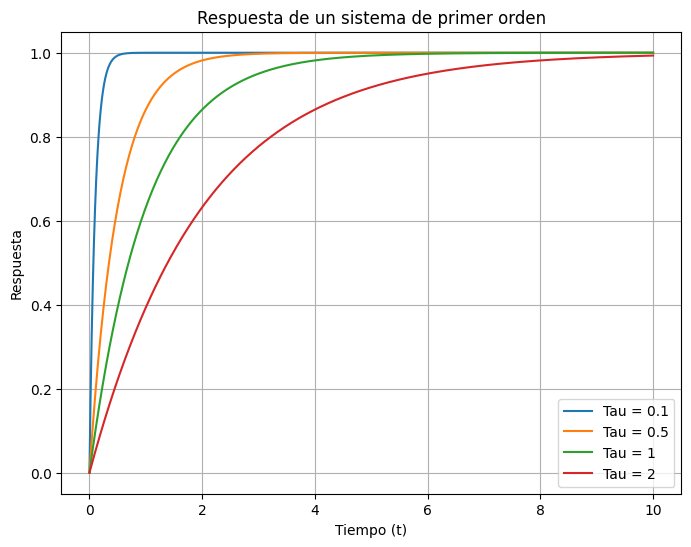

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Lista de diferentes valores de la constante de tiempo (τ)
tau_values = [0.1, 0.5, 1, 2]

# Ganancia del sistema
K = 1

# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Título y etiquetas de los ejes
ax.set_title('Respuesta de un sistema de primer orden')
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Respuesta')

# Rango de tiempo para el gráfico
t = np.linspace(0, 10, 1000)

# Crear y graficar las respuestas para diferentes valores de la constante de tiempo (τ)
for tau in tau_values:
    num = [K]
    den = [tau, 1]
    system = signal.TransferFunction(num, den)
    _, y = signal.step(system, T=t)
    label = f'Tau = {tau}'
    ax.plot(t, y, label=label)

ax.grid()
ax.legend()
plt.show()


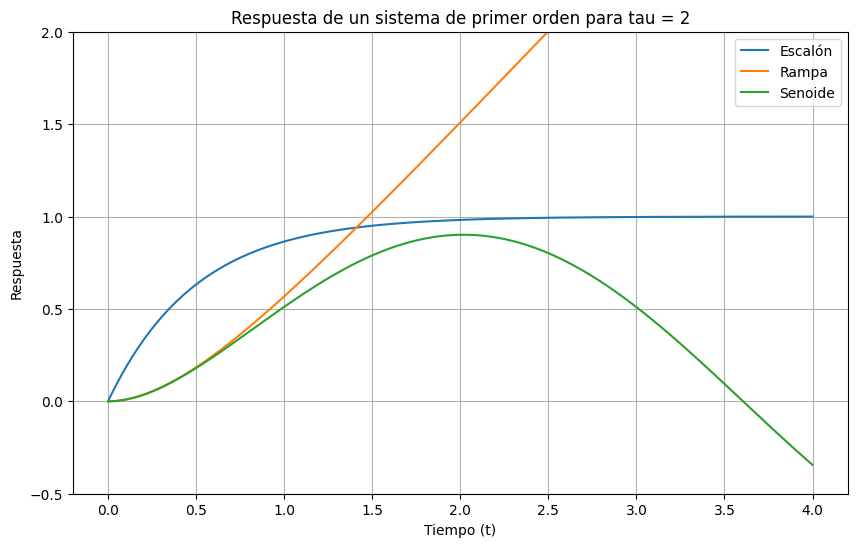

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Valor de la constante de tiempo (τ)
tau = 0.5

# Ganancia del sistema
K = 1

# Rango de tiempo para el gráfico
t = np.linspace(0, 4, 1000)

# Crear las señales de entrada: escalón, rampa y senoide
u_step = np.ones_like(t)
u_ramp = t
u_sine = np.sin(t)

# Crear el sistema de primer orden
num = [K]
den = [tau, 1]
system = signal.TransferFunction(num, den)

# Calcular las respuestas para diferentes entradas
_, y_step, _ = signal.lsim(system, u_step, t)
_, y_ramp, _ = signal.lsim(system, u_ramp, t)
_, y_sine, _ = signal.lsim(system, u_sine, t)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(t, y_step, label='Escalón')
plt.plot(t, y_ramp, label='Rampa')
plt.plot(t, y_sine, label='Senoide')
plt.title('Respuesta de un sistema de primer orden para tau = 2')
plt.xlabel('Tiempo (t)')
plt.ylabel('Respuesta')
plt.ylim(-0.5, 2.0)
plt.grid()
plt.legend()
plt.show()


<center><h2>Sistemas de segundo orden

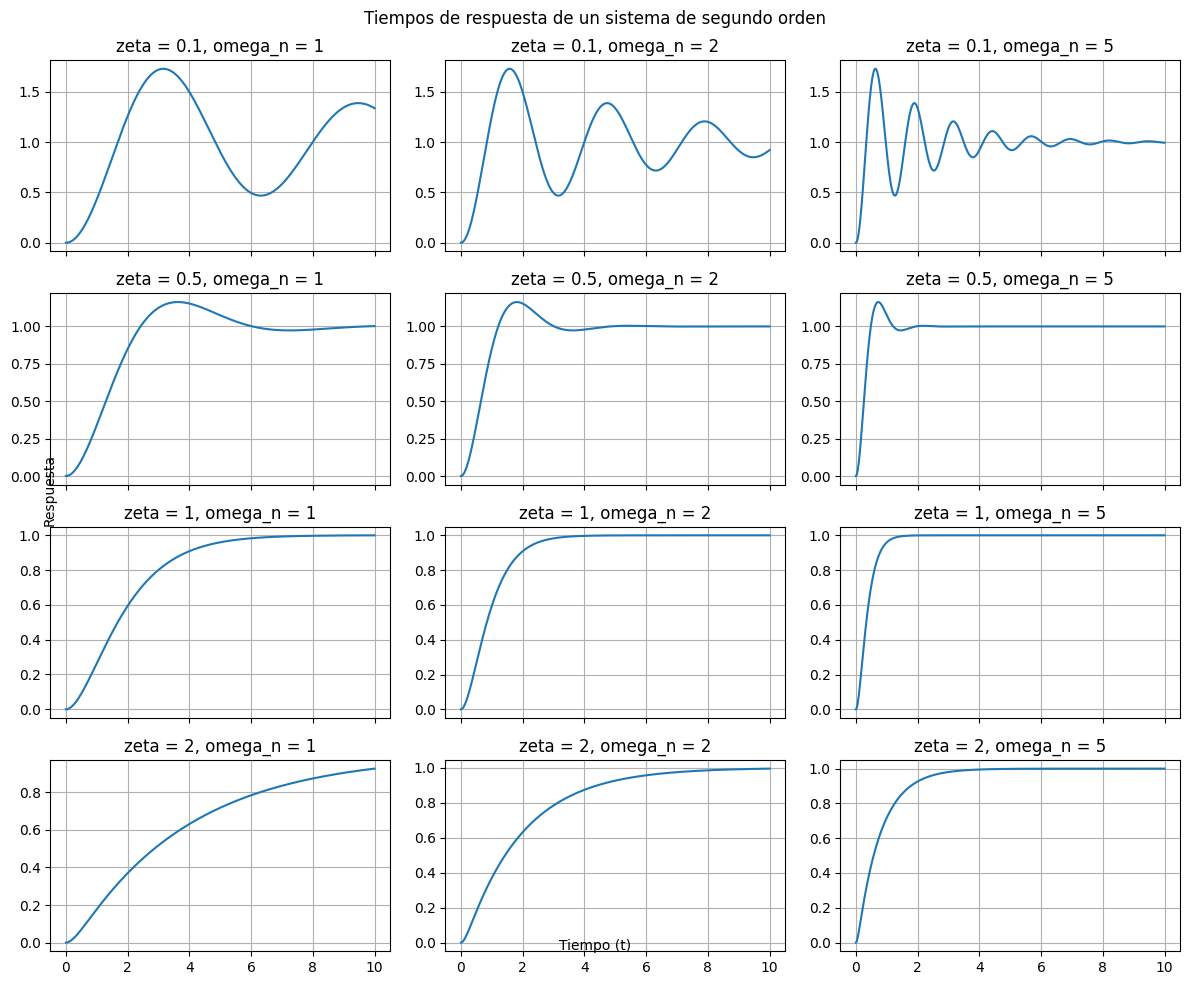

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Valores de los coeficientes de amortiguamiento (zeta) y frecuencia natural (omega_n)
zeta_values = [0.1, 0.5, 1, 2]
omega_n_values = [1, 2, 5]

# Crear la figura y los ejes para las gráficas
fig, axs = plt.subplots(len(zeta_values), len(omega_n_values), figsize=(12, 10), sharex=True)

# Títulos y etiquetas de los ejes
fig.suptitle('Tiempos de respuesta de un sistema de segundo orden')
fig.text(0.5, 0.04, 'Tiempo (t)', ha='center')
fig.text(0.04, 0.5, 'Respuesta', va='center', rotation='vertical')

# Rango de tiempo para las gráficas
t = np.linspace(0, 10, 1000)

# Crear y graficar las respuestas para cada combinación de zeta y omega_n
for i, zeta in enumerate(zeta_values):
    for j, omega_n in enumerate(omega_n_values):
        num = [omega_n**2]
        den = [1, 2*zeta*omega_n, omega_n**2]
        system = signal.TransferFunction(num, den)
        _, y = signal.step(system, T=t)
        axs[i, j].plot(t, y)
        axs[i, j].set_title(f'zeta = {zeta}, omega_n = {omega_n}')
        axs[i, j].grid()

plt.tight_layout()
plt.show()


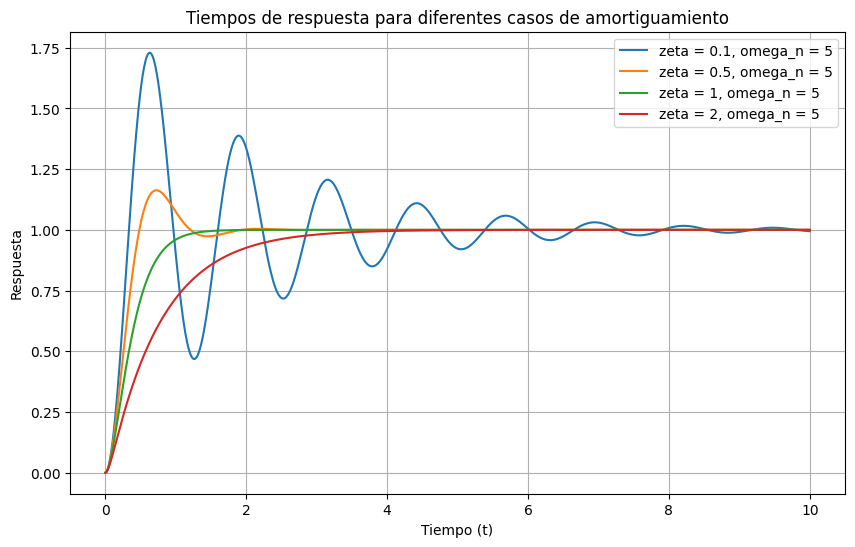

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Lista de diferentes valores de frecuencia natural (omega_n)
omega_n_values = [5]

# Lista de diferentes valores de coeficiente de amortiguamiento (zeta)
zeta_values = [0.1, 0.5, 1, 2]

# Crear la figura y los ejes para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Título y etiquetas de los ejes
ax.set_title('Tiempos de respuesta para diferentes casos de amortiguamiento')
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Respuesta')

# Rango de tiempo para el gráfico
t = np.linspace(0, 10, 1000)

# Crear y graficar las respuestas para diferentes valores de omega_n y zeta
for zeta in zeta_values:
    for omega_n in omega_n_values:
        num = [omega_n**2]
        den = [1, 2*zeta*omega_n, omega_n**2]
        system = signal.TransferFunction(num, den)
        _, y = signal.step(system, T=t)
        label = f'zeta = {zeta}, omega_n = {omega_n}'
        ax.plot(t, y, label=label)

ax.grid()
ax.legend()
plt.show()



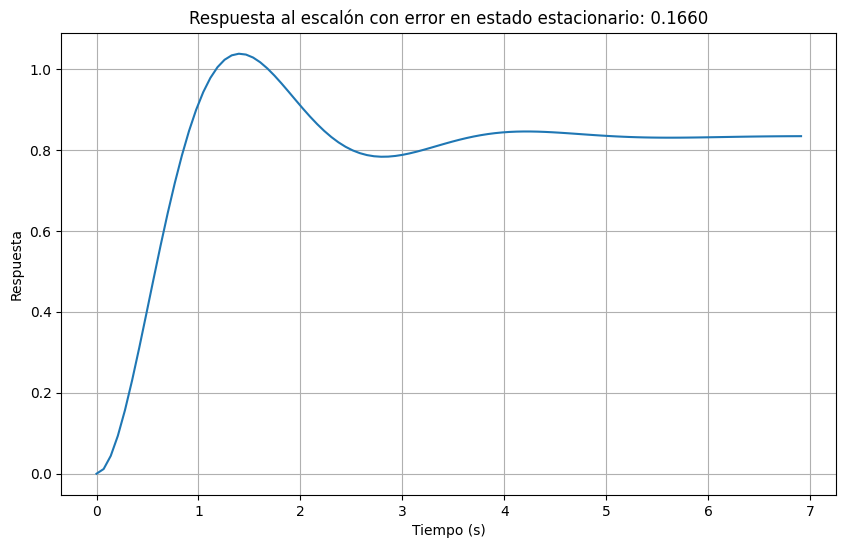

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definir la función de transferencia del sistema
numerator = [1]
denominator = [1, 2, 1]  # G(s) = 1 / (s^2 + 2s + 1)
system = ctrl.TransferFunction(numerator, denominator)

# Diseñar un controlador proporcional (P)
Kp = 5  # Ganancia proporcional
controller = ctrl.TransferFunction([Kp], [1])

# Configurar el sistema de lazo cerrado (sistema + controlador)
closed_loop_system = ctrl.feedback(controller * system, 1)

# Simular la respuesta al escalón
time, response = ctrl.step_response(closed_loop_system)

# Calcular el error en estado estacionario (ESS)
desired_value = 1  # Valor deseado
ess = desired_value - response[-1]

# Graficar la respuesta al escalón
plt.figure(figsize=(10, 6))
plt.plot(time, response)
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.title(f'Respuesta al escalón con error en estado estacionario: {ess:.4f}')
plt.grid(True)
plt.show()


<center><h1>MÓDULO 2. ANÁLISIS DE SISTEMAS DE CONTROL EN EL DOMINIO DE LA FRECUENCIA

<center>
<h1>Transformada de Laplace </h1>


In [7]:
import sympy as sp
from IPython.display import display, Math
t = sp.symbols('t', positive = True)
A, a = sp.symbols('A'), sp.symbols('a')
f_t = sp.exp(2*t)*sp.sin(3*t)
s = sp.symbols('s')

F_s = sp.laplace_transform(f_t, t, s)

display(Math('T.\ de\ Laplace\ F(S): \quad {}'.format(sp.latex(F_s[0]))))

<IPython.core.display.Math object>

<center>
<h1>Transformada inversa de Laplace</h1>

In [8]:
import sympy as sp
from IPython.display import display, Math
s = sp.symbols('s')
f_s = (8*s**2 - 4*s +12)/(s*(s**2+4))
t = sp.symbols('t', positive = True)
f_t = sp.inverse_laplace_transform(f_s, s, t)

display(Math(f'T.\ inversa\ de\ Laplace\ f(t): \quad {sp.latex(f_t)}'))

<IPython.core.display.Math object>

In [9]:
F_S = 1/(s+3)**2

f_t = sp.inverse_laplace_transform(F_S, s, t)

display(Math(f'T.\ inversa\ de\ Laplace\ f(t): \quad {sp.latex(f_t)}'))

<IPython.core.display.Math object>

In [10]:
# Ejemplo #2

F_S = 2/((s + 1)*(s+2))

f_t = sp.inverse_laplace_transform(F_S, s ,t)
display(Math(f'T.\ inversa\ de\ Laplace\ f(t): \quad {sp.latex(f_t)}'))

<IPython.core.display.Math object>

In [11]:
F_S = 3/(s*(s**2 + 2*s + 5))

f_t = sp.inverse_laplace_transform(F_S, s ,t)
display(Math(f'T.\ inversa\ de\ Laplace\ f(t): \quad {sp.latex(f_t)}'))

<IPython.core.display.Math object>

<center><h2>Función de transferencia

In [12]:
import scipy.signal as signal

# Definir los coeficientes del numerador y denominador de la función de transferencia
num = [2, 5]   # Coeficientes del numerador: 2s + 5
den = [1, 3, 4]   # Coeficientes del denominador: s^2 + 3s + 4

# Crear la función de transferencia a partir de los coeficientes
transfer_function = signal.TransferFunction(num, den)

# Obtener los coeficientes del numerador y denominador de la función de transferencia
num_output, den_output = transfer_function.num, transfer_function.den

# Imprimir los coeficientes del numerador y denominador
print("Coeficientes del numerador:", num_output)
print("Coeficientes del denominador:", den_output)

# Calcular la respuesta en frecuencia de la función de transferencia
w, mag, phase = signal.bode(transfer_function)

# Imprimir la respuesta en frecuencia
print("Frecuencia (rad/s):", w)
print("Magnitud (dB):", mag)
print("Fase (grados):", phase)


<center><h4>SISTEMA MASA-RESORTE-AMORTIGUADOR</h4>

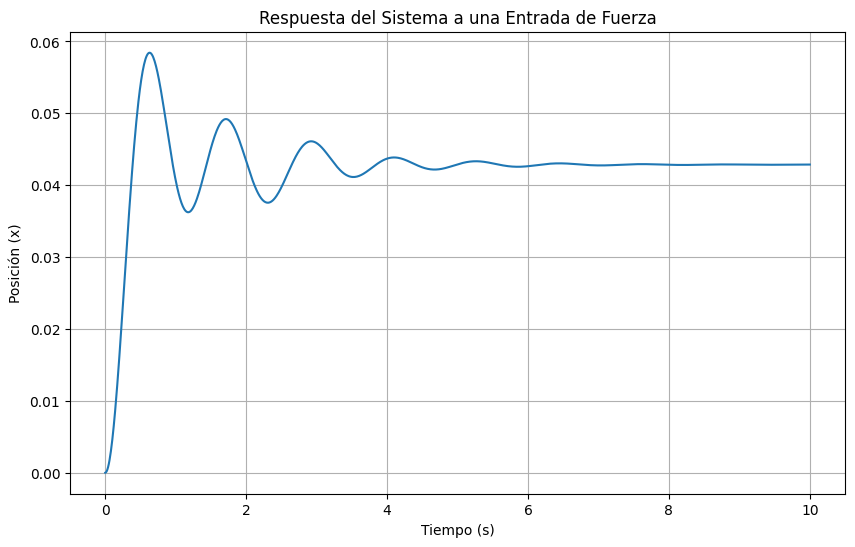

In [67]:
from scipy.signal import TransferFunction, step
import numpy as np # Operaciones Matemáticas
import matplotlib.pyplot as plt # Gráficas


# Definimos los parámetros del sistema
m1 = 1.0 # Masa 1 (Kg)
m2 = 1.0 # Masa 2 (Kg)
k1 = 20.0 # Resorte 1 (N/m)
k2 = 10.0 # Resorte 2 (N/m)
k3 = 5.0 # Resorte 3 (N/m)
b1 = 2.0 # Amortiguador (Ns/m)

# Creamos la función de transferencia

num = [m2, b1, k2+k3]

den = [m1*m2,
       m1*b1+m2*b1,
       (k2+k3)*m1 + (k1+k2)*m2,
       (k2+k3)*b1 + (k1+k2)*b1,
       k1*k2+k1*k3+k2*k3]

system = TransferFunction(num, den)

t = np.linspace(0, 10, 1000)

# Simulamos la respuesta edl sistema

time, response = step(system, T=t)

plt.figure(figsize=(10, 6))
plt.plot(time, response)
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (x)')
plt.title('Respuesta del Sistema a una Entrada de Fuerza')
plt.grid()
plt.show()

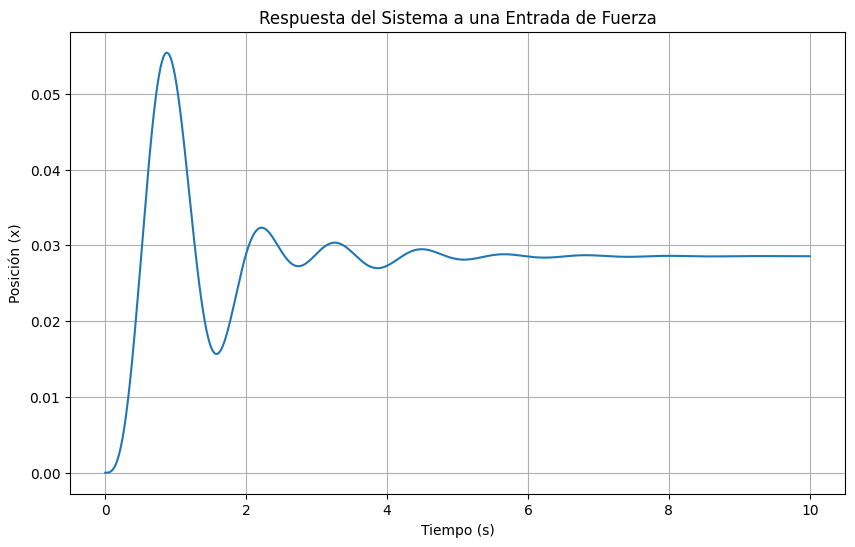

In [68]:
# Para x2

num2 = [b1*m2, k2*m2+b1**2, 2*k2*b1+k3*b1, k2**2+k2*k3]
a = (k2+k3)*m1 + (k2+k1)*m2
b = (k2+k3)*b1 + (k1+k2)*b1
c = k1*k2 + k1*k3 + k2*k3
den2 = [m1*m2**2,
       (2*m1+m2)*m2*b1,
       (k2+k3)*m1*m2 + (m1+m2)*b1**2 + a*m2,
       (k2+k3)*(m1+m2)*b1 + a*b1 + b*m2,
       (k2+k3)*a + b*b1 + c*m2,
       (k2+k3)*b + c*b1,
       (k2+k3)*c]

system2 = TransferFunction(num2, den2)

time2, response2 = step(system2, T=t)

plt.figure(figsize=(10, 6))
plt.plot(time2, response2)
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (x)')
plt.title('Respuesta del Sistema a una Entrada de Fuerza')
plt.grid()
plt.show()

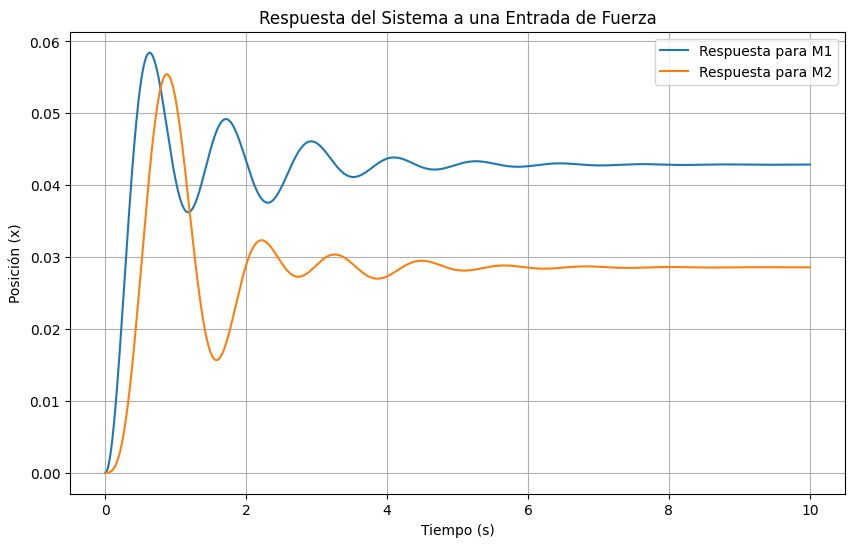

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(time, response, label="Respuesta para M1")
plt.plot(time2, response2, label="Respuesta para M2")
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (x)')
plt.title('Respuesta del Sistema a una Entrada de Fuerza')
plt.grid()
plt.legend()
plt.show()

<center><h3> Diagramas de Bode

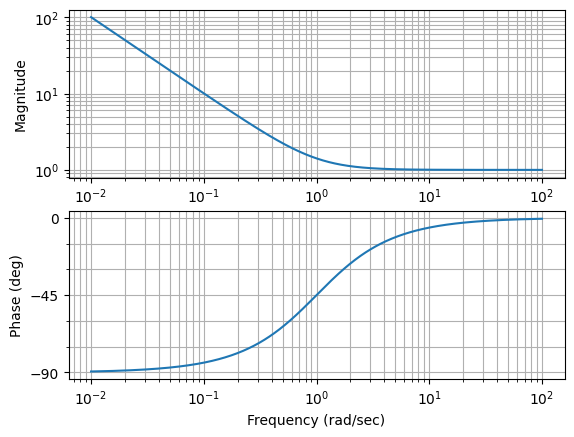

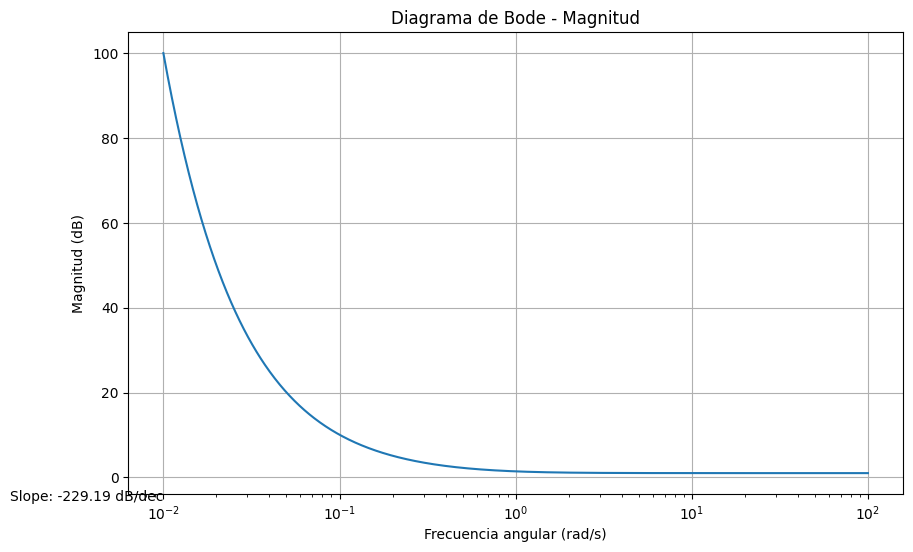

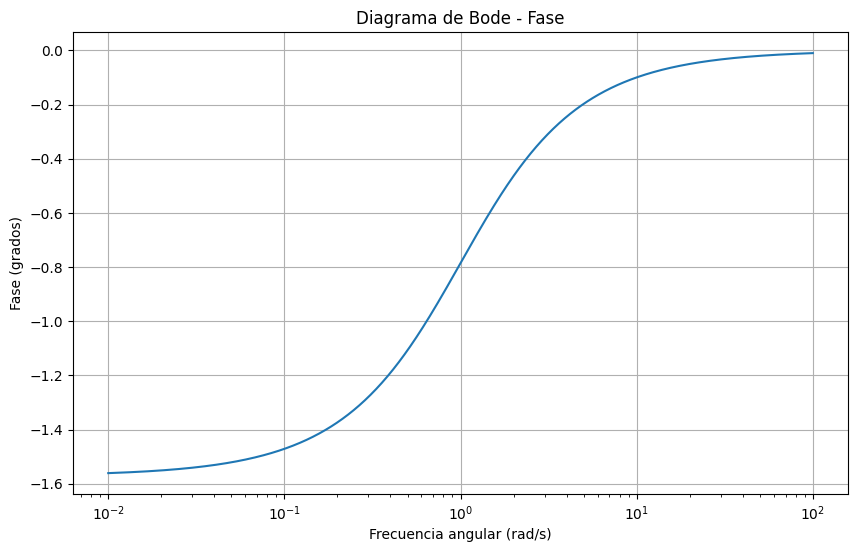

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definir la función de transferencia G(s) = (s + a)
def G(s, a):
    return s + a

# Definir el valor de 'a'
a = 1  # Puedes ajustar el valor de 'a' según tus necesidades

# Crear la función de transferencia en el dominio de Laplace
numerator = [1, a]
denominator = [1, 0]  # Denominador de G(s) = (s + a)

# Crear el sistema de la función de transferencia
system = ctrl.TransferFunction(numerator, denominator)

# Calcular la respuesta en frecuencia
omega = np.logspace(-2, 2, 1000)  # Rango de frecuencias angulares
magnitude, phase, omega_c = ctrl.bode(system, omega)

# Encontrar la frecuencia de corte aproximada
index_cutoff = np.argmax(magnitude <= -3)  # Buscar el índice donde la magnitud es -3 dB o menor
frequency_cutoff = omega[index_cutoff]     # Obtener la frecuencia de corte

# Obtener el slope (pendiente) en el corte de frecuencia
slope = np.diff(magnitude) / np.diff(np.log10(omega))
slope_at_cutoff = slope[index_cutoff]

# Graficar el diagrama de Bode de la magnitud en dB
plt.figure(figsize=(10, 6))
plt.semilogx(omega, magnitude)
plt.xlabel('Frecuencia angular (rad/s)')
plt.ylabel('Magnitud (dB)')
plt.title(f'Diagrama de Bode - Magnitud')
plt.grid(True)

# Agregar texto con el valor del slope en el corte de frecuencia
plt.text(frequency_cutoff, -3, f"Slope: {slope_at_cutoff:.2f} dB/dec", ha='right', va='top')

plt.show()

# Graficar el diagrama de Bode de la fase en grados
plt.figure(figsize=(10, 6))
plt.semilogx(omega, phase)
plt.xlabel('Frecuencia angular (rad/s)')
plt.ylabel('Fase (grados)')
plt.title(f'Diagrama de Bode - Fase')
plt.grid(True)
plt.show()


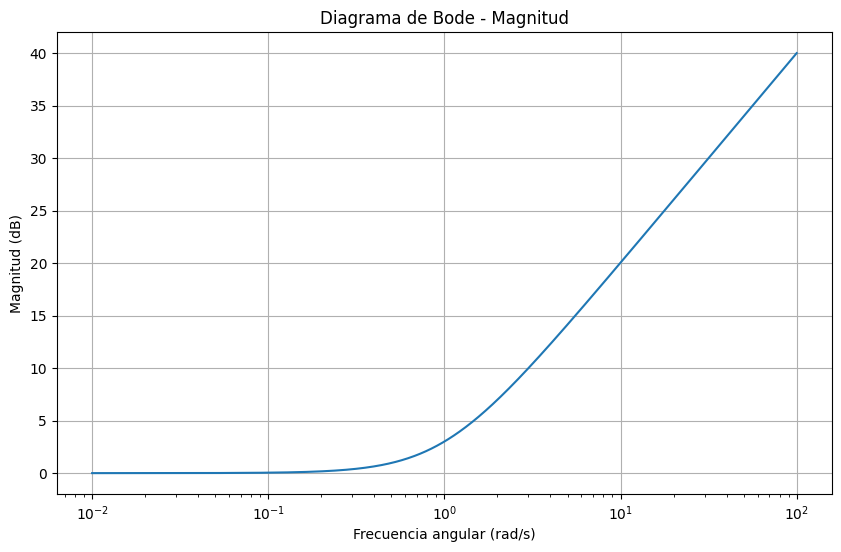

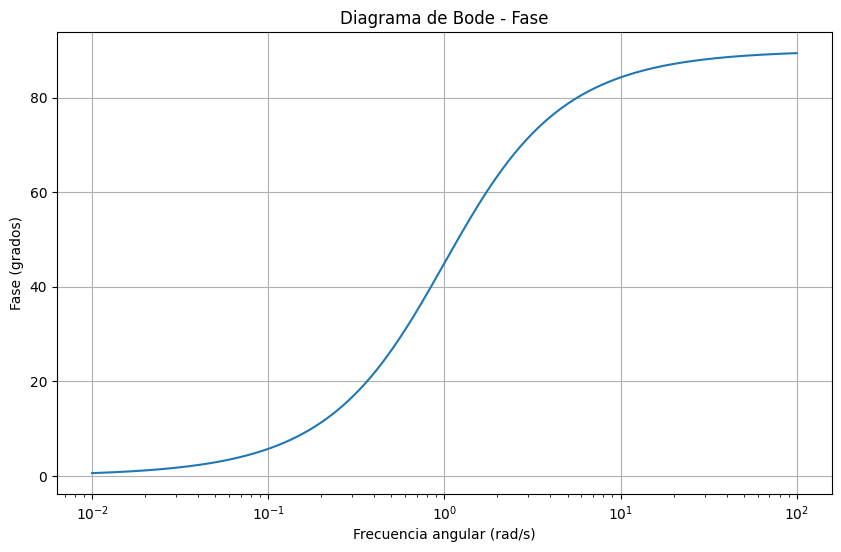

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de transferencia G(s) = (s + a)
def G(s, a):
    return s + a

# Definir el rango de frecuencias angulares para el diagrama de Bode (bajas frecuencias)
omega = np.logspace(-2, 2, 1000)

# Obtener la función de transferencia para el rango de frecuencias angulares
a = 1  # Puedes ajustar el valor de 'a' según tus necesidades
Gjw = G(1j*omega, a)

# Calcular la magnitud y la fase de la función de transferencia
magnitude = np.abs(Gjw)
phase = np.angle(Gjw, deg=True)  # Convertir la fase de radianes a grados

# Graficar el diagrama de Bode de la magnitud
plt.figure(figsize=(10, 6))
plt.semilogx(omega, 20*np.log10(magnitude))  # Convertir la magnitud a dB
plt.xlabel('Frecuencia angular (rad/s)')
plt.ylabel('Magnitud (dB)')
plt.title('Diagrama de Bode - Magnitud')
plt.grid(True)
plt.show()

# Graficar el diagrama de Bode de la fase
plt.figure(figsize=(10, 6))
plt.semilogx(omega, phase)
plt.xlabel('Frecuencia angular (rad/s)')
plt.ylabel('Fase (grados)')
plt.title('Diagrama de Bode - Fase')
plt.grid(True)
plt.show()


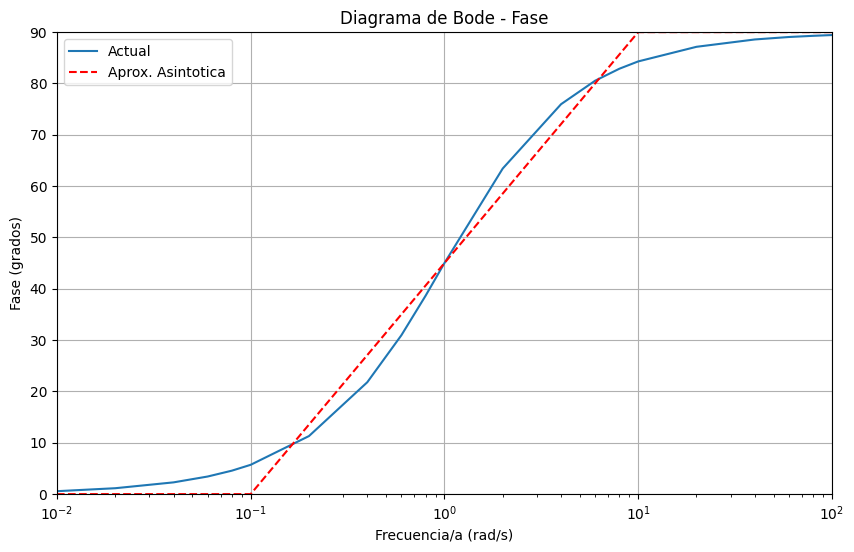

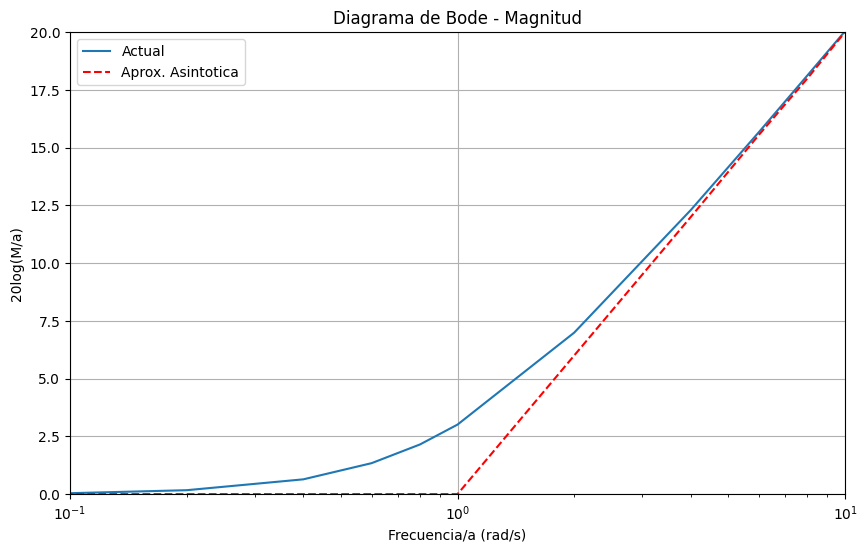

In [20]:
frec = [0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.6, 0.8, 1, 2, 4, 6, 8, 10, 20, 40, 60, 80, 100]

mag_asy = [0,0,0,0,0,0,0,0,0,0,0,6,12,15.56,18,20,26.02,32.04,35.56,38.06,40]

mag_act = [0.00,0.00,0.01,0.02,0.03,0.04,0.17,0.64,1.34,2.15,3.01,6.99,12.30,15.68,18.13,20.04,26.03,32.04,35.56,38.06,40.00]

fase_asy = [0.00,0.00,0.00,0.00,0.00,0.00,13.55,27.09,35.02,40.64,45.00,58.55,72.09,80.02,85.64,90.00,90.00,90.00,90.00,90.00,90.00]

fase_act = [0.57,1.15,2.29,3.43,4.57,5.71,11.31,21.80,30.96,38.66,45.00,63.43,75.96,80.54,82.87,84.29,87.14,88.57,89.05,89.28,89.43]



plt.figure(figsize=(10, 6))
plt.semilogx(frec, fase_act, label="Actual")
plt.semilogx(frec, fase_asy, '--r', label="Aprox. Asintotica")
plt.xlabel('Frecuencia/a (rad/s)')
plt.ylabel('Fase (grados)')
plt.title('Diagrama de Bode - Fase')
plt.xlim(0.01, 100)
plt.ylim(0, 90)
plt.grid(True)
plt.legend()
plt.show()



plt.figure(figsize=(10, 6))
plt.semilogx(frec, mag_act, label="Actual")
plt.semilogx(frec, mag_asy, '--r', label='Aprox. Asintotica')
plt.xlabel('Frecuencia/a (rad/s)')
plt.ylabel('20log(M/a)')
plt.title('Diagrama de Bode - Magnitud')
plt.xlim(0.1, 10)
plt.ylim(0, 20)
plt.grid(True)
plt.legend()
plt.show()

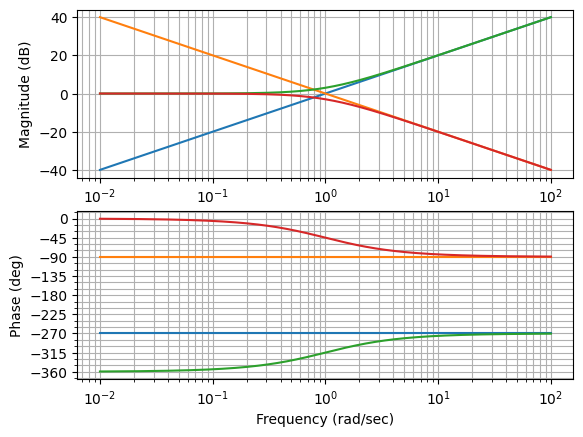

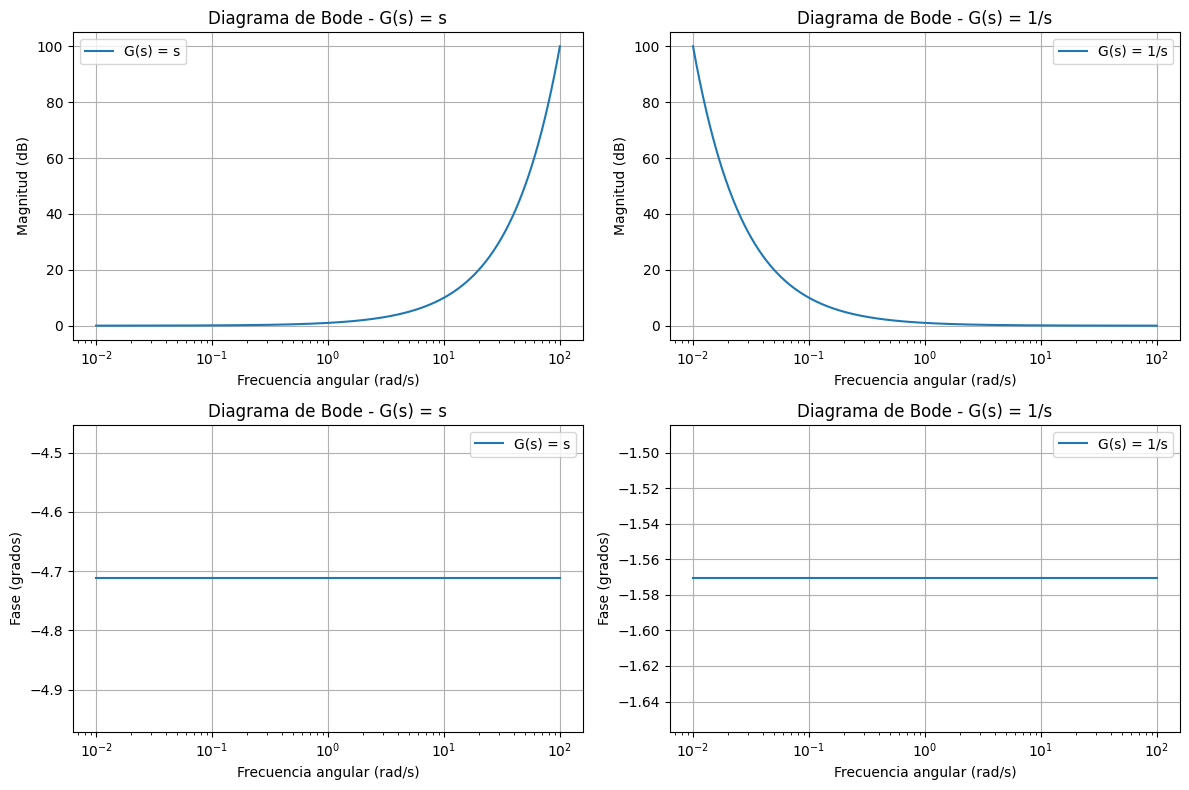

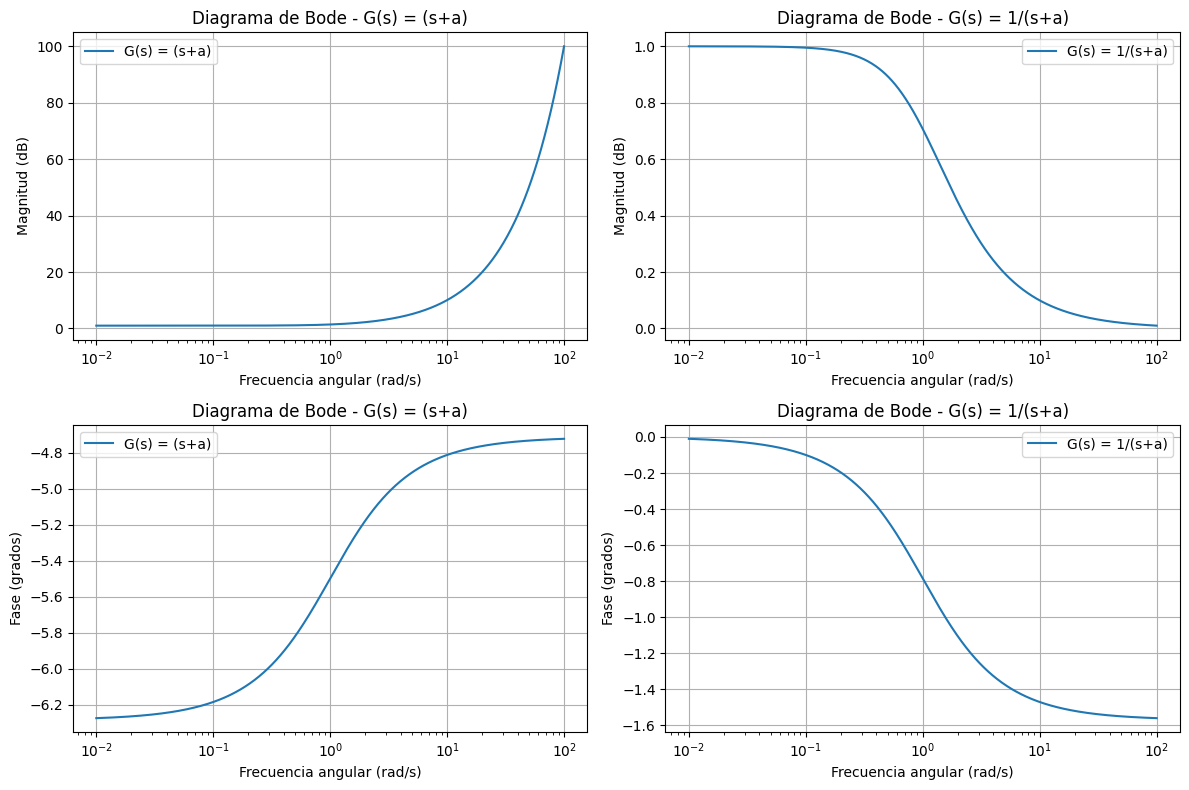

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definir la función de transferencia G(s) = s
numerator1 = [1, 0]
denominator1 = [1]

# Definir la función de transferencia G(s) = 1/s
numerator2 = [1]
denominator2 = [1, 0]

# Definir el valor de 'a'
a = 1

# Definir la función de transferencia G(s) = (s+a)
numerator3 = [1, a]
denominator3 = [1]

# Definir la función de transferencia G(s) = 1/(s+a)
numerator4 = [1]
denominator4 = [1, a]

# Crear los sistemas de las funciones de transferencia
system1 = ctrl.TransferFunction(numerator1, denominator1)
system2 = ctrl.TransferFunction(numerator2, denominator2)
system3 = ctrl.TransferFunction(numerator3, denominator3)
system4 = ctrl.TransferFunction(numerator4, denominator4)

# Calcular la respuesta en frecuencia para cada sistema
omega = np.logspace(-2, 2, 1000)  # Rango de frecuencias angulares
magnitude1, phase1, _ = ctrl.bode(system1, omega, dB=True)
magnitude2, phase2, _ = ctrl.bode(system2, omega, dB=True)
magnitude3, phase3, _ = ctrl.bode(system3, omega, dB=True)
magnitude4, phase4, _ = ctrl.bode(system4, omega, dB=True)

# Graficar los diagramas de Bode con etiquetas y leyendas
plt.figure(figsize=(12, 8))

# Diagrama de Bode para G(s) = s
plt.subplot(2, 2, 1)
plt.semilogx(omega, magnitude1)
plt.xlabel('Frecuencia angular (rad/s)')
plt.ylabel('Magnitud (dB)')
plt.title('Diagrama de Bode - G(s) = s')
plt.grid(True)
plt.legend(['G(s) = s'])

plt.subplot(2, 2, 3)
plt.semilogx(omega, phase1)
plt.xlabel('Frecuencia angular (rad/s)')
plt.ylabel('Fase (grados)')
plt.title('Diagrama de Bode - G(s) = s')
plt.grid(True)
plt.legend(['G(s) = s'])

# Diagrama de Bode para G(s) = 1/s
plt.subplot(2, 2, 2)
plt.semilogx(omega, magnitude2)
plt.xlabel('Frecuencia angular (rad/s)')
plt.ylabel('Magnitud (dB)')
plt.title('Diagrama de Bode - G(s) = 1/s')
plt.grid(True
plt.legend(['G(s) = 1/s'])

plt.subplot(2, 2, 4)
plt.semilogx(omega, phase2)
plt.xlabel('Frecuencia angular (rad/s)')
plt.ylabel('Fase (grados)')
plt.title('Diagrama de Bode - G(s) = 1/s')
plt.grid(True)
plt.legend(['G(s) = 1/s'])

plt.tight_layout()
plt.show()

# Diagrama de Bode para G(s) = (s+a)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.semilogx(omega, magnitude3)
plt.xlabel('Frecuencia angular (rad/s)')
plt.ylabel('Magnitud (dB)')
plt.title('Diagrama de Bode - G(s) = (s+a)')
plt.grid(True)
plt.legend(['G(s) = (s+a)'])

plt.subplot(2, 2, 3)
plt.semilogx(omega, phase3)
plt.xlabel('Frecuencia angular (rad/s)')
plt.ylabel('Fase (grados)')
plt.title('Diagrama de Bode - G(s) = (s+a)')
plt.grid(True)
plt.legend(['G(s) = (s+a)'])

# Diagrama de Bode para G(s) = 1/(s+a)
plt.subplot(2, 2, 2)
plt.semilogx(omega, magnitude4)
plt.xlabel('Frecuencia angular (rad/s)')
plt.ylabel('Magnitud (dB)')
plt.title('Diagrama de Bode - G(s) = 1/(s+a)')
plt.grid(True)
plt.legend(['G(s) = 1/(s+a)'])

plt.subplot(2, 2, 4)
plt.semilogx(omega, phase4)
plt.xlabel('Frecuencia angular (rad/s)')
plt.ylabel('Fase (grados)')
plt.title('Diagrama de Bode - G(s) = 1/(s+a)')
plt.grid(True)
plt.legend(['G(s) = 1/(s+a)'])

plt.tight_layout()
plt.show()



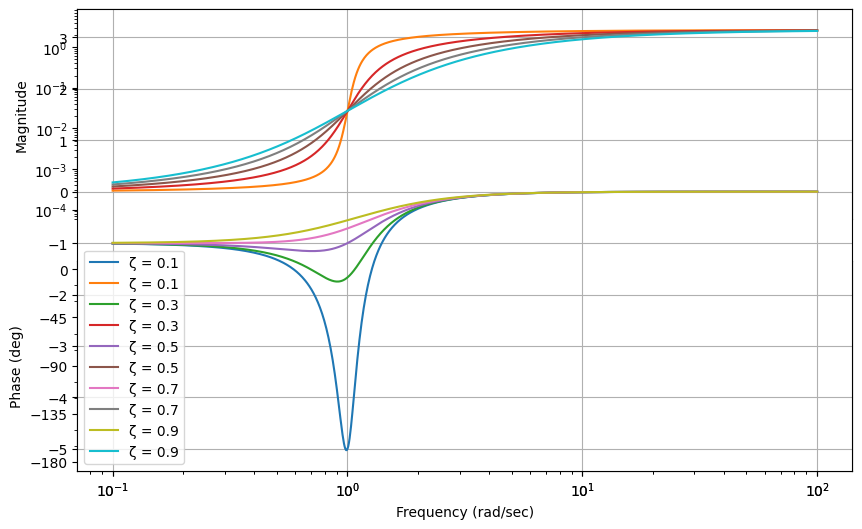

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definir la función de transferencia G(s) para el sistema de segundo orden
def second_order_system(zeta, omega_n):
    numerator = [1]
    denominator = [1, 2 * zeta * omega_n, omega_n**2]
    return ctrl.TransferFunction(numerator, denominator)

# Valores de factor de amortiguamiento (ζ) a explorar
zeta_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Frecuencia natural (omega_n)
omega_n = 1.0

# Crear el rango de frecuencias angulares para los diagramas de Bode
omega = np.logspace(-1, 2, 1000)

# Graficar el diagrama de Bode para diferentes valores de ζ
plt.figure(figsize=(10, 6))

for zeta in zeta_values:
    system = second_order_system(zeta, omega_n)

    # Calcular la respuesta en frecuencia para el sistema de segundo orden
    magnitude, phase, _ = ctrl.bode(system, omega, dB=False)

    # Diagrama de Bode - Magnitud
    plt.subplot()
    plt.semilogx(omega, -magnitude, label=f'ζ = {zeta}')
    plt.gca().invert_yaxis()

    # Diagrama de Bode - Fase
    plt.subplot()
    plt.semilogx(omega, -phase, label=f'ζ = {zeta}')  # Invertir la fase
    plt.gca().invert_yaxis()  # Invertir el eje y para voltear la gráfica de fase

plt.legend()
plt.grid()

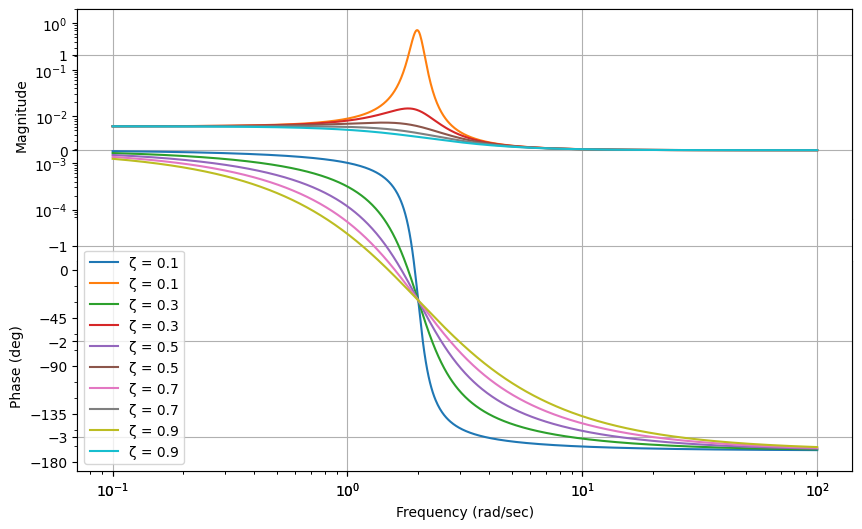

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definir los parámetros del sistema de segundo orden
K = 1.0
omega_n = 2.0

# Valores de factor de amortiguamiento (ζ) a explorar
zeta_values = [0.1, 0.3, 0.5, 0.7, 0.9]

# Crear el rango de frecuencias angulares para los diagramas de Bode
omega = np.logspace(-1, 2, 1000)

# Graficar el diagrama de Bode para diferentes valores de ζ
plt.figure(figsize=(10, 6))

for zeta in zeta_values:
    # Crear la función de transferencia G(s) para el sistema de segundo orden
    denominator = [1, 2 * zeta * omega_n, omega_n**2]
    system = ctrl.TransferFunction(K, denominator)

    # Calcular la respuesta en frecuencia para el sistema de segundo orden
    magnitude, phase, _ = ctrl.bode(system, omega, dB=False)

    # Diagrama de Bode - Fase
    plt.subplot()
    plt.semilogx(omega, phase, label=f'ζ = {zeta}')
    # Diagrama de Bode - Magnitud
    plt.subplot()
    plt.semilogx(omega, magnitude, label=f'ζ = {zeta}')



plt.grid(True)
plt.legend()



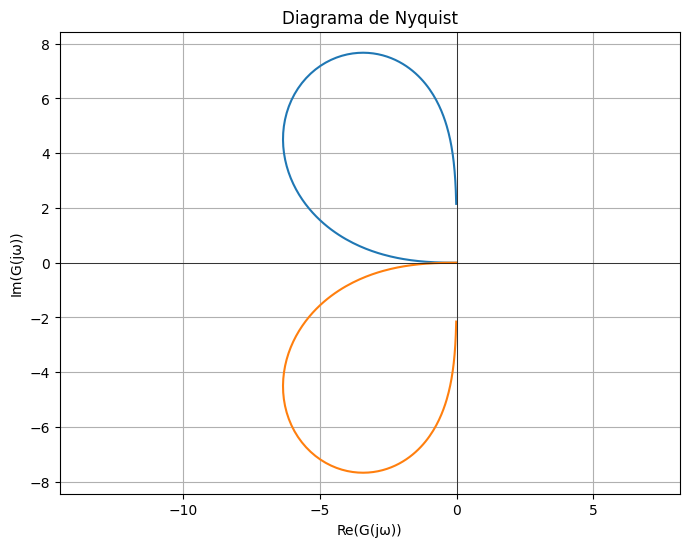

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define la función de transferencia (reemplaza la función G(s) según tu caso)
def G(s):
    return (645*s**2) / (169*s**4 + (30*s - s**3))

# Genera una lista de frecuencias angulares desde 0.1 hasta 1000 (puedes ajustar estos valores según tu caso)
omega = np.logspace(-1, 3, 500)

# Calcula los valores de la función de transferencia en los puntos de frecuencia angular
Gjw = G(1j*omega)

# Obtiene las partes real e imaginaria de la función de transferencia
re_Gjw = np.real(Gjw)
im_Gjw = np.imag(Gjw)

# Traza el diagrama de Nyquist
plt.figure(figsize=(8, 6))
plt.plot(re_Gjw, im_Gjw)
plt.plot(re_Gjw, -im_Gjw)  # Agrega el reflejo sobre el eje real para completar el diagrama
plt.xlabel('Re(G(jω))')
plt.ylabel('Im(G(jω))')
plt.title('Diagrama de Nyquist')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.axis('equal')
plt.show()


<center><h1>MÓDULO 3. ANÁLISIS Y DISEÑO DE SISTEMAS DE CONTROL EN EL DOMINIO DEL TIEMPO

<center><h2>Lugar Geometríco de las Raíces

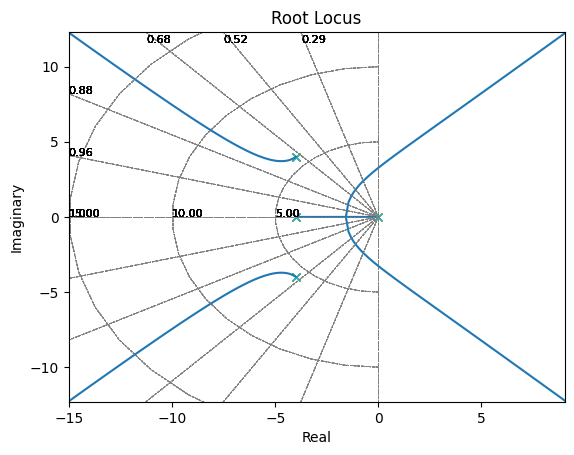

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import control

# Coeficientes del polinomio en el denominador
denominator_coeffs = [1, 12, 64, 128, 0]
# Valores de K que queremos probar en el lugar geométrico de las raíces
K_values = np.linspace(0.01, 10, 10)

# Inicializamos listas para almacenar las raíces de una sola iteración
roots_real_single = []
roots_imag_single = []

# Calculamos las raíces y las almacenamos para una sola iteración
for K in K_values:
    # Coeficientes del numerador (para K)
    numerator_coeffs = [K]
    # Calculamos el lugar geométrico de las raíces
    sys = control.TransferFunction(numerator_coeffs, denominator_coeffs)
    roots = control.root_locus(sys)
    # Almacenamos las partes real e imaginaria de las raíces
    roots_real_single.append(roots[0].real)
    roots_imag_single.append(roots[0].imag)

<center><h3>CONVIRTIENDO DE ESPACIO DE ESTADOS
A FUNCIÓN DE TRANSFERENCIA


In [25]:
# Ejemplo 1
import  numpy as np
import sympy as sp
from IPython.display import display, Math
A = np.array([[0, 1, 0],
     [0, 0, 1],
     [-1, -2, -3]])

B = np.array([[10], [0], [0]])

C = np.array([[1, 0, 0]])

s = sp.symbols('s')

I = np.eye(A.shape[0])

# Calculamos (sI-A)
sI_A = sp.Matrix(s*I - A)

# Hallamos (sI - A)^-1
inv_sI_A = sI_A.inv()

# Calculamos T(S) = C(sI - A)^-1B + D
T = C @ inv_sI_A @ B

display(Math('Función\ de\ transferencia\ T(S): \quad {}'.format(sp.latex(T))))

<IPython.core.display.Math object>

<center><h1>MÓDULO 4. DISEÑO DE CONTROLADORES EN EL DOMINIO DEL TIEMPO

In [83]:
import numpy as np
from scipy.signal import TransferFunction, step
import control as ctrl
import matplotlib.pyplot as plt

# diseñamos la planta
m = 10
b = 5
n = [1]
d = [m, b]

system = ctrl.TransferFunction(n, d)

In [84]:
system

TransferFunction(array([1]), array([10,  5]))

<center><h3> Control PID

In [111]:
# Controlador PID
kp = 10
ki = 5
kd = 5

numpid = [kp, ki, kd]
denpid = [1, 0]

controller = ctrl.TransferFunction(numpid, denpid)

In [112]:
controller

TransferFunction(array([10,  5,  5]), array([1, 0]))

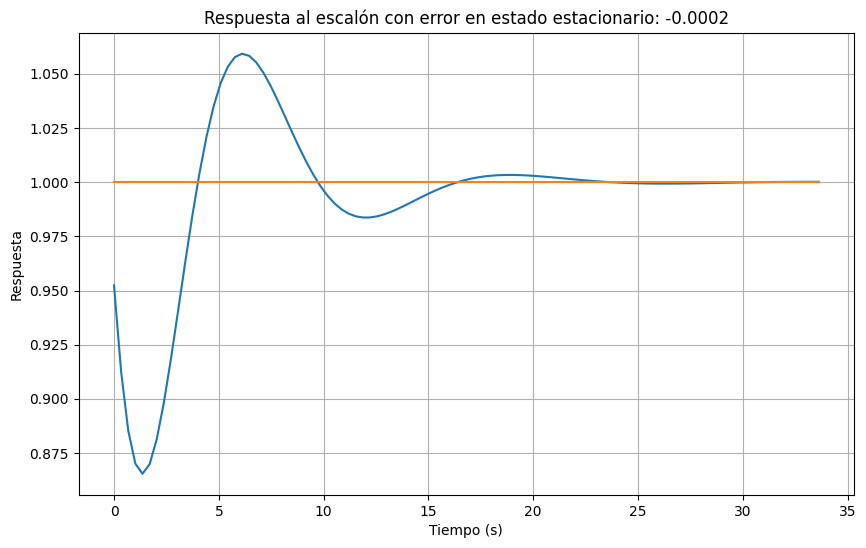

In [113]:
closed_loop_system = ctrl.feedback(controller*system, 1)
# Simular la respuesta al escalón
time, response = ctrl.step_response(closed_loop_system)

# Calcular el error en estado estacionario (ESS)
desired_value = 1  # Valor deseado
ess = desired_value - response[-1]
sp = [[1] for k in range(len(time))]
# Graficar la respuesta al escalón
plt.figure(figsize=(10, 6))
plt.plot(time, response)
plt.plot(time, sp)
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')

plt.title(f'Respuesta al escalón con error en estado estacionario: {ess:.4f}')
plt.grid(True)
plt.show()

<center><h3> Control P

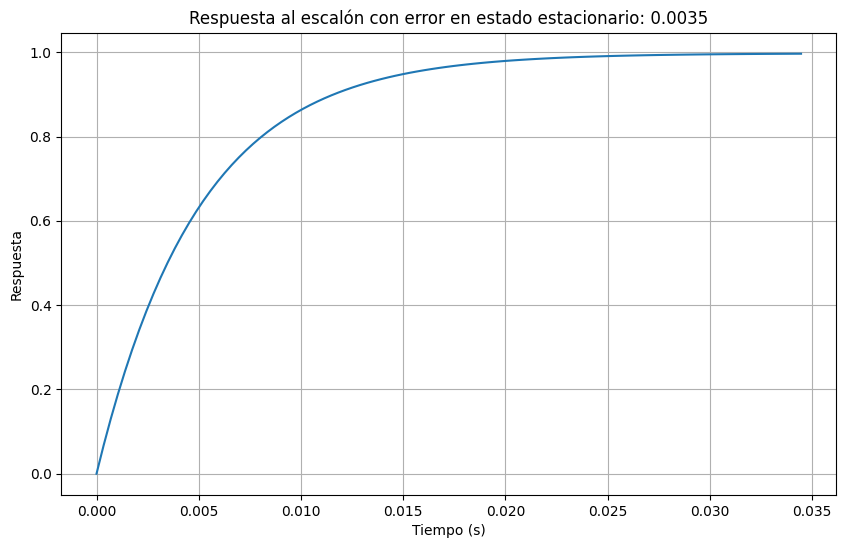

In [92]:
# Controlador P
K = 2000

np = [K]
dp = [1]

controller = ctrl.TransferFunction(np, dp)

closed_loop_system = ctrl.feedback(controller*system, 1)
# Simular la respuesta al escalón
time, response = ctrl.step_response(closed_loop_system)

# Calcular el error en estado estacionario (ESS)
desired_value = 1  # Valor deseado
ess = desired_value - response[-1]

# Graficar la respuesta al escalón
plt.figure(figsize=(10, 6))
plt.plot(time, response)
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')

plt.title(f'Respuesta al escalón con error en estado estacionario: {ess:.4f}')
plt.grid(True)
plt.show()

<center><h3> Control I

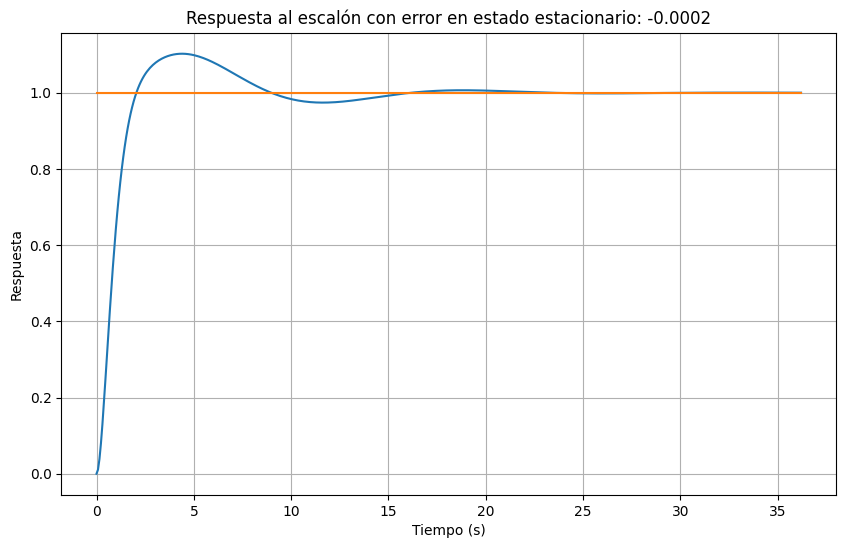

In [116]:
# Controlador I
K = 2

np = [K]
dp = [1, 0]

controller = ctrl.TransferFunction(np, dp)

closed_loop_system = ctrl.feedback(controller*system, 1)
# Simular la respuesta al escalón
time, response = ctrl.step_response(closed_loop_system)

# Calcular el error en estado estacionario (ESS)
desired_value = 1  # Valor deseado
ess = desired_value - response[-1]
sp = [[1] for k in range(len(time))]
# Graficar la respuesta al escalón
plt.figure(figsize=(10, 6))
plt.plot(time, response)
plt.plot(time, sp)
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')

plt.title(f'Respuesta al escalón con error en estado estacionario: {ess:.4f}')
plt.grid(True)
plt.show()

<center><h3>Control PD

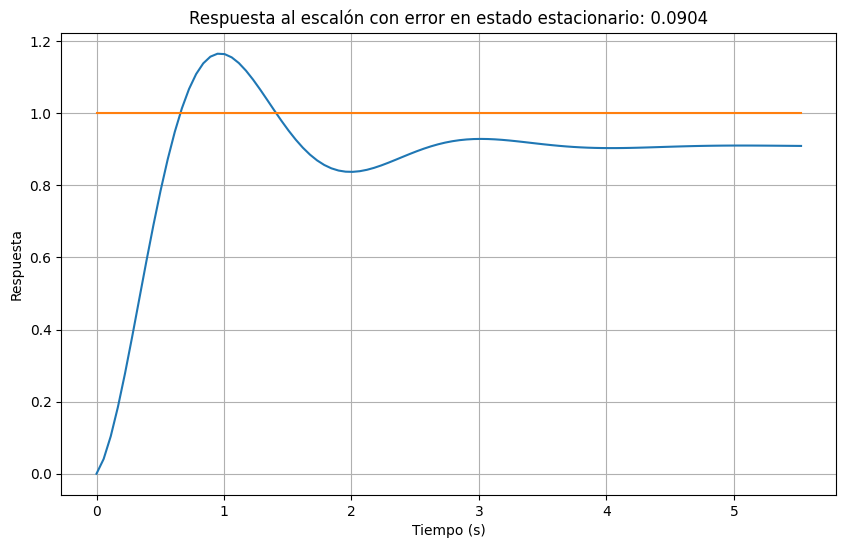

In [129]:
# Planta
num = [1]
den = [1, 2 ,1]

system = ctrl.TransferFunction(num, den)
# Controlador PD
Kp = 2
kd = 0.5

np = [kd, kp]
dp = [1]

controller = ctrl.TransferFunction(np, dp)

closed_loop_system = ctrl.feedback(controller*system, 1)
# Simular la respuesta al escalón
time, response = ctrl.step_response(closed_loop_system)

# Calcular el error en estado estacionario (ESS)
desired_value = 1  # Valor deseado
ess = desired_value - response[-1]
sp = [[1] for k in range(len(time))]
# Graficar la respuesta al escalón
plt.figure(figsize=(10, 6))
plt.plot(time, response)
plt.plot(time, sp)
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')

plt.title(f'Respuesta al escalón con error en estado estacionario: {ess:.4f}')
plt.grid(True)
plt.show()

<center><h3> Control PI

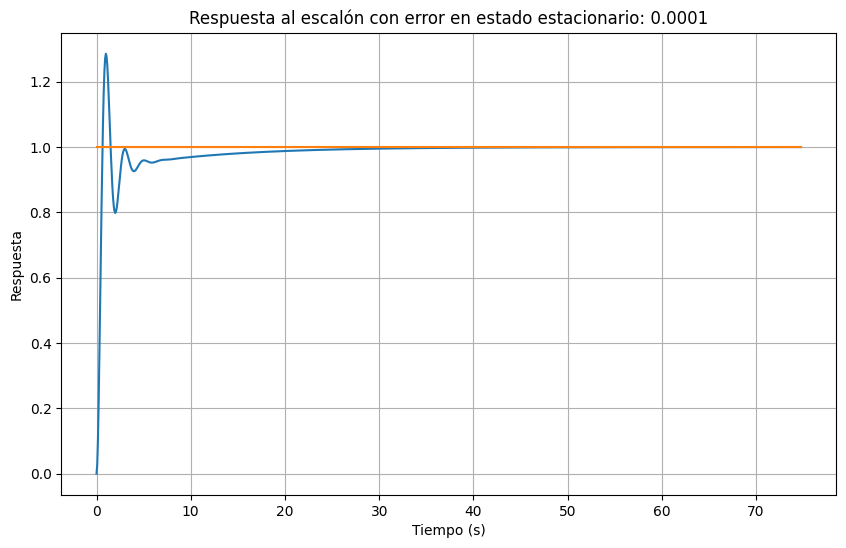

In [133]:
# Planta
num = [1]
den = [1, 2 ,1]

system = ctrl.TransferFunction(num, den)
# Controlador PI
Kp = 2
ki = 1

np = [kp, ki]
dp = [1, 0]

controller = ctrl.TransferFunction(np, dp)

closed_loop_system = ctrl.feedback(controller*system, 1)
# Simular la respuesta al escalón
time, response = ctrl.step_response(closed_loop_system)

# Calcular el error en estado estacionario (ESS)
desired_value = 1  # Valor deseado
ess = desired_value - response[-1]
sp = [[1] for k in range(len(time))]
# Graficar la respuesta al escalón
plt.figure(figsize=(10, 6))
plt.plot(time, response)
plt.plot(time, sp)
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')

plt.title(f'Respuesta al escalón con error en estado estacionario: {ess:.4f}')
plt.grid(True)
plt.show()

<center><h1>MÓDULO 5. CONTROL DIGITAL Y SISTEMAS EN TIEMPO DISCRETO

<center><h3>Muestreo de la señal.

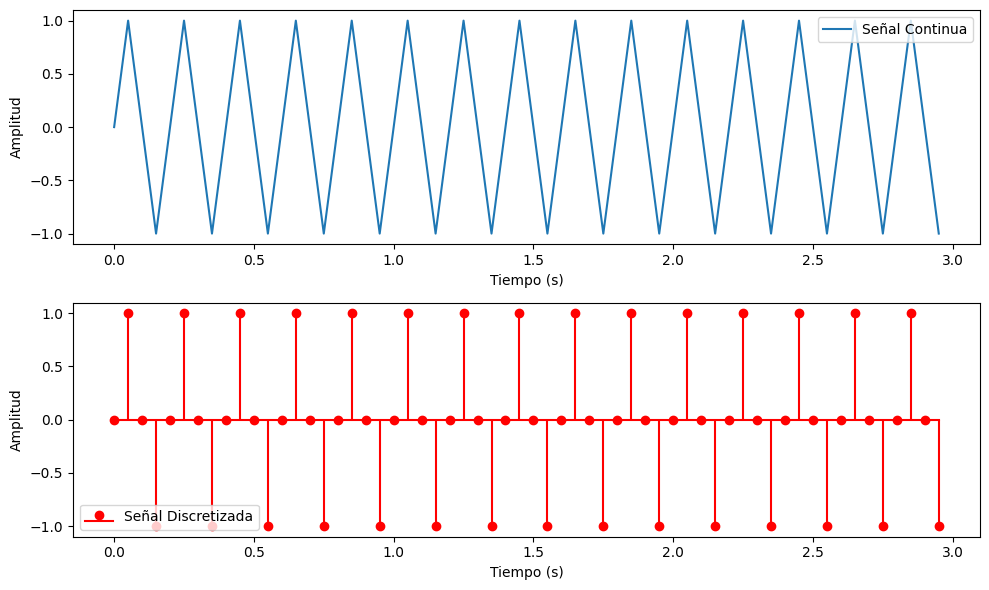

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal continua
frecuencia = 5  # Frecuencia en Hz
periodo = 1 / frecuencia  # Periodo en segundos
amplitud = 1.0

# Parámetros de la discretización
frecuencia_muestreo = 20  # Frecuencia de muestreo en Hz
periodo_muestreo = 1 / frecuencia_muestreo  # Periodo de muestreo en segundos
duracion = 3.0  # Duración de la señal en segundos
num_muestras = int(duracion / periodo_muestreo)

# Genera la señal continua
tiempo_continuo = np.linspace(0, duracion, num_muestras, endpoint=False)
senal_continua = amplitud * np.sin(2 * np.pi * frecuencia * tiempo_continuo)

# Genera los puntos de muestreo
tiempo_muestreo = np.arange(0, duracion, periodo_muestreo)
muestras = amplitud * np.sin(2 * np.pi * frecuencia * tiempo_muestreo)

# Graficar señal continua y señal discretizada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(tiempo_continuo, senal_continua, label='Señal Continua')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(2, 1, 2)
plt.stem(tiempo_muestreo, muestras, markerfmt='ro', linefmt='r-', basefmt='r-', label='Señal Discretizada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\migue\OneDrive\Escritorio\ControlTheoryPY\venv\Lib\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


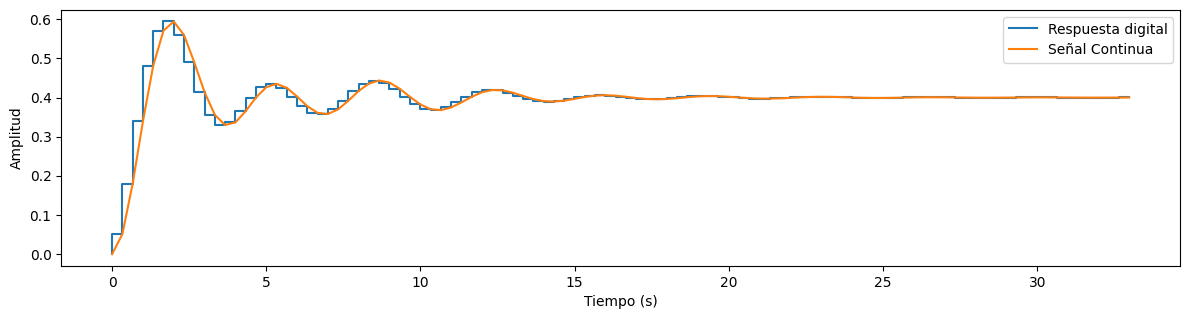

In [450]:
import numpy as np
from scipy.signal import TransferFunction, dstep, step
import matplotlib.pyplot as plt

# Coeficientes de la función de transferencia continua
m1 = 1.0
m2 = 1.0
b1 = 0.5
k1 = 2.0
k2 = 1.0
k3 = 1.0

# Definir la función de transferencia continua
num = [m2, b1, k2 + k3]
den = [m1 * m2, m1 * b1 + m2 * b1, (k2 + k3) * m1 + (k1 + k2) * m2, (k2 + k3) * b1 + (k1 + k2) * b1, k1 * k2 + k1 * k3 + k2 * k3]
system_continuous = TransferFunction(num, den)

# Frecuencia de muestreo y discretización
frecuencia_muestreo = 1000  # Frecuencia de muestreo en Hz
dt = 1 / frecuencia_muestreo  # Intervalo de muestreo en segundos

# Discretizar la función de transferencia
system_discrete = system_continuous.to_discrete(dt, method='zoh')

# Generar una señal de entrada (por ejemplo, una entrada escalón)
t = np.arange(0, 5, dt)
u = np.ones_like(t)  # Entrada escalón

# Calcular la respuesta del sistema continuo y digitalizado a la entrada
t_continuous, y_continuous = step(system_continuous)
t_discrete, y_discrete = dstep(system_discrete)

# Graficar la respuesta del sistema continuo y digitalizado
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.step(t_continuous, y_continuous, label='Respuesta digital')
plt.plot(t_continuous, y_continuous, label="Señal Continua")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
t_discrete = t_discrete.reshape(100, 1)

plt.tight_layout()
plt.show()


<center><h2>Transformada Z

In [26]:
import sympy as sp
from IPython.display import display, Math

n, T, z = sp.symbols('n T z')
x_n = n * T
X_z = sp.summation(x_n * z**(-n), (n, 0, sp.oo))
X_z_simplified = sp.simplify(X_z)
display(Math('Z-Transform\ of\ x[n]\ =\ nT: \quad {}'.format(sp.latex(X_z_simplified))))


<IPython.core.display.Math object>

<center><h2>Compensación Digital

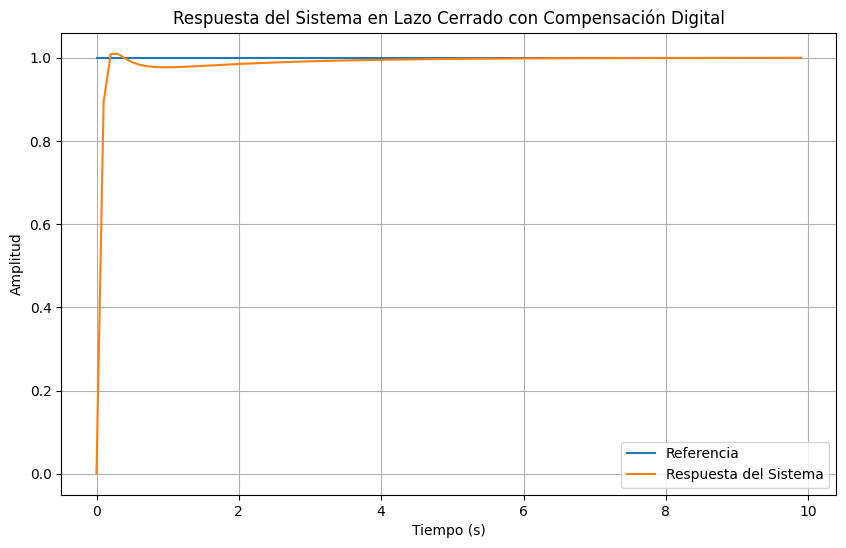

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Parámetros del sistema de segundo orden
omega_n = 2  # Frecuencia natural
zeta = 0.7   # Coeficiente de amortiguamiento

# Crear la función de transferencia del sistema de segundo orden
num = [omega_n**2]
den = [1, 2 * zeta * omega_n, omega_n**2]
system = ctrl.TransferFunction(num, den)

# Definir el período de muestreo para la compensación digital
Ts = 0.1

# Diseñar un controlador digital (por ejemplo, un controlador PID discreto)
kp = 2.0
ki = 1.0
kd = 0.5
num_c = [kd, kp, ki]
den_c = [Ts, 0]
controller = ctrl.TransferFunction(num_c, den_c)

# Conectar el controlador al sistema
system_cl = ctrl.feedback(controller * system, 1)

# Generar una señal de referencia escalón
t = np.arange(0, 10, Ts)
r = np.ones(len(t))

# Simular la respuesta del sistema en lazo cerrado
t, y = ctrl.step_response(system_cl, T=t)

# Graficar la respuesta
plt.figure(figsize=(10, 6))
plt.plot(t, r, label='Referencia')
plt.plot(t, y, label='Respuesta del Sistema')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Respuesta del Sistema en Lazo Cerrado con Compensación Digital')
plt.show()



<center><h1>MÓDULO 6. CONTROL AVANZADO Y TÉCNICAS MODERNAS

<center><h2>CONTROL MODERNO

In [447]:
def PID(Kp, Ki, Kd, MV_bar=0):
    e_prev = 0
    t_prev = -100
    I = 0

    MV = MV_bar

    while True:
        t, PV, SP = yield MV

        e = SP - PV

        P = Kp*e
        I = I + Ki*e*(t - t_prev)
        D = Kd*(e - e_prev)/(t - t_prev)

        MV = MV_bar + P + I + D

        e_prev = e
        t_prev = t

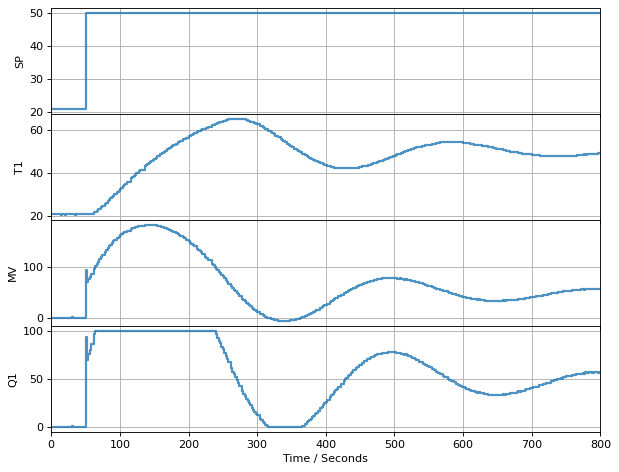

TCLab Model disconnected successfully.


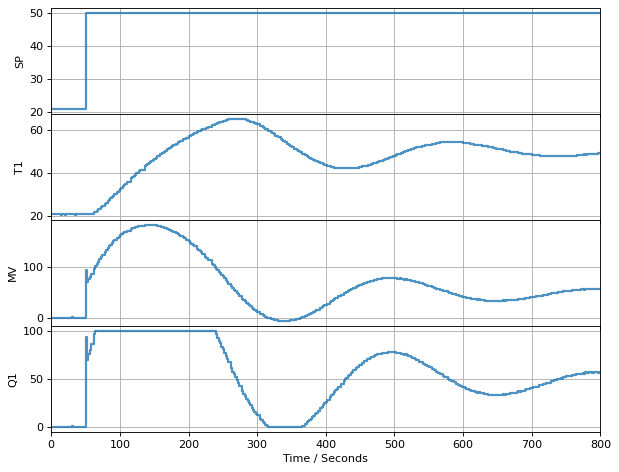

In [448]:
%matplotlib inline
from tclab import clock, setup, Historian, Plotter

TCLab = setup(connected=False, speedup=10)

controller = PID(2, 0.1, 2)
controller.send(None)

tfinal = 800

with TCLab() as lab:
    h = Historian([('SP', lambda: SP), ('T1', lambda: lab.T1), ('MV', lambda: MV), ('Q1', lab.Q1)])
    p = Plotter(h, tfinal)
    T1 = lab.T1
    for t in clock(tfinal, 2):
        SP = T1 if t < 50 else 50
        PV = lab.T1
        MV = controller.send([t, PV, SP])
        lab.U1 = MV
        p.update(t)

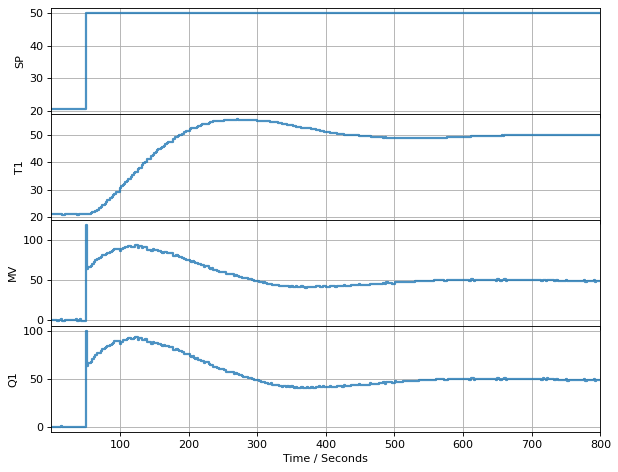

TCLab Model disconnected successfully.


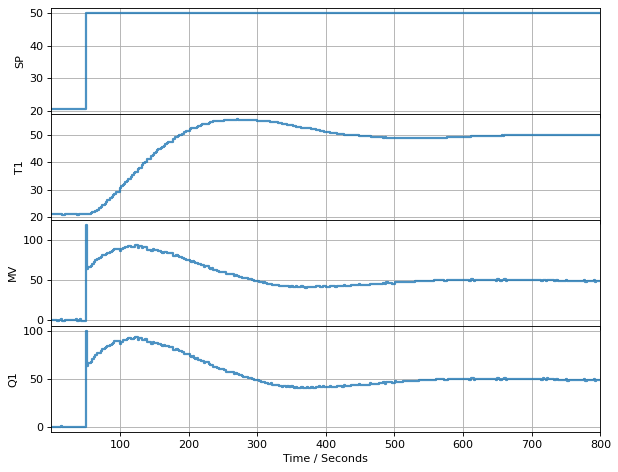

In [449]:
%matplotlib inline
from tclab import clock, setup, Historian, Plotter

TCLab = setup(connected=False, speedup=10)

# Parámetros del controlador PID
Kp = 2.0
Ki = 0.1
Kd = 2.0

# Inicialización de variables
SP = 0
MV = 0
error_integral = 0
last_error = 0

tfinal = 800

with TCLab() as lab:
    h = Historian([('SP', lambda: SP), ('T1', lambda: lab.T1), ('MV', lambda: MV), ('Q1', lab.Q1)])
    p = Plotter(h, tfinal)
    T1 = lab.T1
    for t in clock(tfinal, 2):
        if t < 50:
            SP = T1
        else:
            SP = 50
        PV = lab.T1
        # Cálculo del error
        error = SP - PV
        error_integral += error
        error_derivative = error - last_error
        # Cálculo de la señal de control (PID)
        MV = Kp * error + Ki * error_integral + Kd * error_derivative
        # Aplicación de la señal de control al sistema
        lab.U1 = MV
        # Actualización del error anterior
        last_error = error
        p.update(t)

<center><h3>Control Robusto

In [ ]:
from scipy.signal import TransferFunction, step
import numpy as np # Operaciones Matemáticas
import matplotlib.pyplot as plt # Gráficas
k = [1, 1/4, 1/16]

# Simulamos la respuesta edl sistema
fig, ax = plt.subplots(figsize=(8, 6))

# Título y etiquetas de los ejes
ax.set_title('Respuesta de un sistema de primer orden')
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('Respuesta')

# Rango de tiempo para el gráfico
t = np.linspace(0, 15, 10000)

# Crear y graficar las respuestas para diferentes valores de la constante de tiempo (τ)
for k_value in k:
    num = [k_value]
    den = [1, 1, k_value]
    system = signal.TransferFunction(num, den)
    _, y = signal.step(system, T=t)
    label = f'K = {k_value}'
    ax.plot(t, y, label=label)

ax.grid()
ax.legend()
plt.show()


k_values = [1/4]

# Frecuencias de interés (en radianes por segundo)
omega = np.logspace(-2, 2, 1000)

# Calcular 20*log|T(jω)| y 20*log|S(jω)| para cada valor de k
for k in k_values:
    num = [k]
    den = [1, 1, k]

    # Función de transferencia T(jω) y sensibilidad S(jω)
    def T(jw):
        return np.polyval(num, jw) / np.polyval(den, jw)

    def S(jw):
        return 1 - T(jw)

    # Calcular 20*log|T(jω)| y 20*log|S(jω)|
    magnitude_T = 20 * np.log10(np.abs(T(1j * omega)))
    magnitude_S = 20 * np.log10(np.abs(S(1j * omega)))

    # Graficar
    plt.semilogx(omega, magnitude_T, label=f'20*log|T(jω)|, k={k}')
    plt.semilogx(omega, magnitude_S, label=f'20*log|S(jω)|, k={k}')

# Configuración de la gráfica
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Magnitud (dB)')
plt.grid(True)
plt.legend()
plt.show()


<center><h3>Analisis de Robustez

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define the transfer function G(s)
num_G = [170000, 17000]  # 170000(s+0.1)
den_G = [1, 13, 100, 5000]  # s(s+3)(s^2+10s+10000)

# Define the transfer function M(s)
num_M = [50]  # 50/(s+50)
den_M = [1, 50]

# Frequency range
omega = np.logspace(-2, 2, 1000)

# Function to calculate magnitude from the transfer function
def magnitude(transfer_function, omega):
    _, H = signal.freqresp(transfer_function, omega)
    return np.abs(H)

# Calculate magnitudes for the first plot
G = signal.TransferFunction(num_G, den_G)
M = signal.TransferFunction(num_M, den_M)

K_values = [0.5]  # Values of K for different cases
for K in K_values:
    KG = signal.TransferFunction([K], [1])
    sys = signal.TransferFunction(np.polymul(KG.num, G.num), np.polymul(KG.den, G.den))
    _, magnitude_1 = signal.freqresp(sys, omega)
    _, magnitude_M = signal.freqresp(M, omega)

    # Plot for |1 + 1/(KG(jw))| and |M(jw)|
    plt.figure(figsize=(10, 6))
    plt.semilogx(omega, magnitude_1, label=f'|1 + 1/(KG(jω)), K={K}')
    plt.semilogx(omega, magnitude_M, label='|M(jω)|')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude')
    plt.title('Magnitudes of |1 + 1/(KG(jw))| and |M(jw)|')
    plt.legend()
    plt.grid(True)

# Calculate magnitudes for the second plot
a_values = [0.5]  # Values of a for different cases
for a in a_values:
    GcG = signal.TransferFunction([a], [1])
    sys = signal.TransferFunction(np.polymul(GcG.num, G.num), np.polymul(GcG.den, G.den))
    _, magnitude_2 = signal.freqresp(sys, omega)
    _, magnitude_M = signal.freqresp(M, omega)

    # Plot for |1 + a/(Gc(jw)G(jw))| and |M(jw)|
    plt.figure(figsize=(10, 6))
    plt.semilogx(omega, magnitude_2, label=f'|1 + {a}/(Gc(jω)G(jω)), a={a}')
    plt.semilogx(omega, magnitude_M, label='|M(jω)|')
    plt.xlabel('Frequency (rad/s)')
    plt.ylabel('Magnitude')
    plt.title('Magnitudes of |1 + a/(Gc(jw)G(jw))| and |M(jw)|')
    plt.legend()
    plt.grid(True)

plt.show()


<center><h2>CONTROL ADAPTATIVO

Tiempo: 1, Salida: 2.97, Kp: 0.70, Error: -2.97, Control: -2.09
Tiempo: 2, Salida: 4.55, Kp: 0.25, Error: -4.55, Control: -1.13
Tiempo: 3, Salida: 4.49, Kp: -0.20, Error: -4.49, Control: 0.90
Tiempo: 4, Salida: 4.31, Kp: -0.63, Error: -4.31, Control: 2.72
Tiempo: 5, Salida: 2.48, Kp: -0.88, Error: -2.48, Control: 2.19
Tiempo: 6, Salida: -0.13, Kp: -0.87, Error: 0.13, Control: -0.11
Tiempo: 7, Salida: -1.86, Kp: -0.68, Error: 1.86, Control: -1.27
Tiempo: 8, Salida: -2.46, Kp: -0.44, Error: 2.46, Control: -1.07
Tiempo: 9, Salida: -5.45, Kp: 0.11, Error: 5.45, Control: 0.59
Tiempo: 10, Salida: -5.88, Kp: 0.70, Error: 5.88, Control: 4.10
Tiempo: 11, Salida: -4.11, Kp: 1.11, Error: 4.11, Control: 4.56
Tiempo: 12, Salida: -1.77, Kp: 1.29, Error: 1.77, Control: 2.27
Tiempo: 13, Salida: 0.80, Kp: 1.21, Error: -0.80, Control: -0.96
Tiempo: 14, Salida: 2.83, Kp: 0.92, Error: -2.83, Control: -2.61
Tiempo: 15, Salida: 5.10, Kp: 0.41, Error: -5.10, Control: -2.10
Tiempo: 16, Salida: 4.74, Kp: -0.06

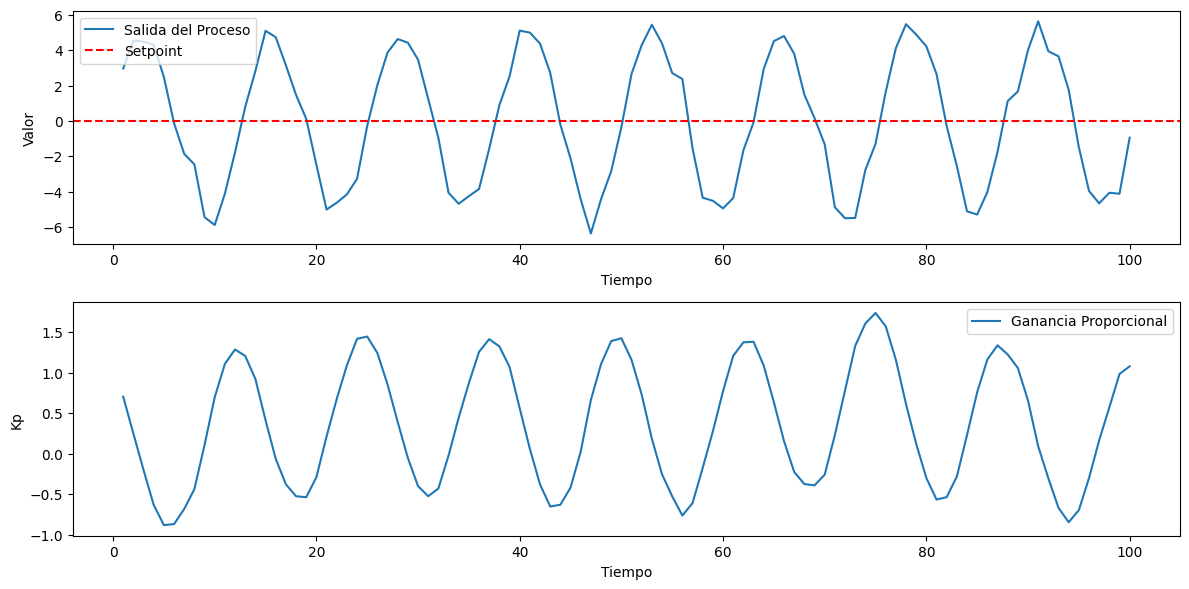

In [143]:
import matplotlib.pyplot as plt
import numpy as np

# Función para simular el proceso (puede ser cualquier proceso que quieras controlar)
def proceso(tiempo):
    return 5 * np.sin(0.5 * tiempo) + np.random.normal(0, 0.5)

# Parámetros iniciales del controlador
kp = 1.0  # Ganancia proporcional inicial
sp = 0.0  # Setpoint deseado
error_anterior = 0.0
ganancia_adaptativa = 0.1  # Tasa de ajuste de la ganancia

# Listas para almacenar datos
tiempo_simulacion = []
salida_proceso = []
ganancia_proporcional = []

# Simulación de control adaptativo
for tiempo in range(1, 101):
    tiempo_simulacion.append(tiempo)
    salida_actual = proceso(tiempo)
    error_actual = sp - salida_actual

    # Ajuste adaptativo de la ganancia proporcional
    kp += ganancia_adaptativa * error_actual

    # Control proporcional
    control = kp * error_actual

    # Almacenar datos
    salida_proceso.append(salida_actual)
    ganancia_proporcional.append(kp)

    # Imprimir información
    print(f"Tiempo: {tiempo}, Salida: {salida_actual:.2f}, Kp: {kp:.2f}, Error: {error_actual:.2f}, Control: {control:.2f}")

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(tiempo_simulacion, salida_proceso, label="Salida del Proceso")
plt.axhline(sp, color='red', linestyle='--', label="Setpoint")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(tiempo_simulacion, ganancia_proporcional, label="Ganancia Proporcional")
plt.xlabel("Tiempo")
plt.ylabel("Kp")
plt.legend()

plt.tight_layout()
plt.show()



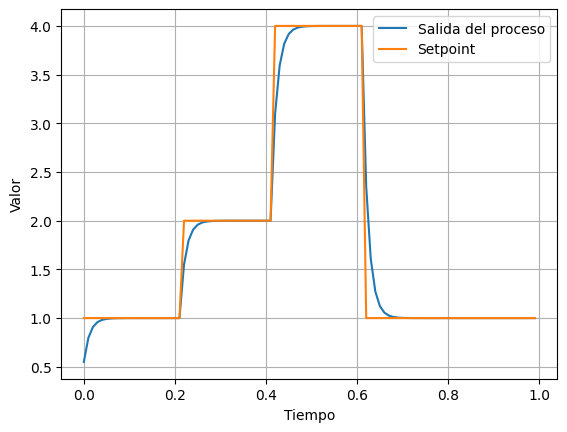

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
A = 1.0
B = 1.0
C = 1.0
D = 0.0

# Parámetros del controlador adaptativo
mu = 0.01  # Tasa de adaptación
kp = 30.0   # Ganancia proporcional inicial
ki = 25.0   # Ganancia integral inicial

# Variables de estado
e_integral = 0.0
setpoint = 1.0
output = 0.0

# Listas para almacenar los resultados
time = []
output_values = []
setpoint_values = []

# Simulación
t_final = 1.0
dt = 0.01

for t in np.arange(0, t_final, dt):
    # Calcular el error
    error = setpoint - output

    # Actualizar la ganancia integral
    e_integral += error * dt
    ki_adaptive = ki + mu * e_integral

    # Calcular la señal de control
    control_signal = kp * error + ki_adaptive * error

    # Simular el proceso (en este caso, simplemente una acumulación)
    output += control_signal * dt

    # Almacenar los resultados
    time.append(t)
    output_values.append(output)
    setpoint_values.append(setpoint)
    if t > 0.2:
        setpoint = 2.0
    if t > 0.4:
        setpoint = 4.0
    if t > 0.6:
        setpoint = 1.0

# Visualización de resultados
plt.figure()
plt.plot(time, output_values, label='Salida del proceso')
plt.plot(time, setpoint_values, label='Setpoint')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


<center><h1>MÓDULO 7. APLICACIONES PRÁCTICAS DE CONTROL

<center><h3>IDENTIFICACIÓN DE SISTEMA SISO

In [401]:
import numpy as np
from scipy.signal import TransferFunction, lsim, dlsim
import matplotlib.pyplot as plt
import sympy as sp
num = [1]
den = [1, 2, 1]

system = TransferFunction(num, den)
#h = 0.1  # Valor de h
#t = np.arange(0, 100 * h + h, h)
t = np.linspace(0, 10, 101)
u = np.random.rand(101, 1)
t, y, x = lsim(system, U=u, T=t)
# Este es un sistema de segundo orden, lo vamos a identificar como un sistema de orden 1
# Tenemos que construir una matriz que nos represente las muestras
Y = y[1:101]
H = np.column_stack((y[0:100], u[0:100]))

In [281]:
H.shape

(100, 2)

In [282]:
HtH_inv = np.linalg.pinv(H)
teta = HtH_inv @ Y

In [283]:
teta

array([0.98869827, 0.01580257])

In [284]:
num1 = teta[1]
den1 = [1, -teta[0]]

In [285]:
system1 = TransferFunction(num1, den1, dt=0.1)

In [286]:
system1

TransferFunctionDiscrete(
array([0.01580257]),
array([ 1.        , -0.98869827]),
dt: 0.1
)

In [287]:
_, y2 = dlsim(system1, u)

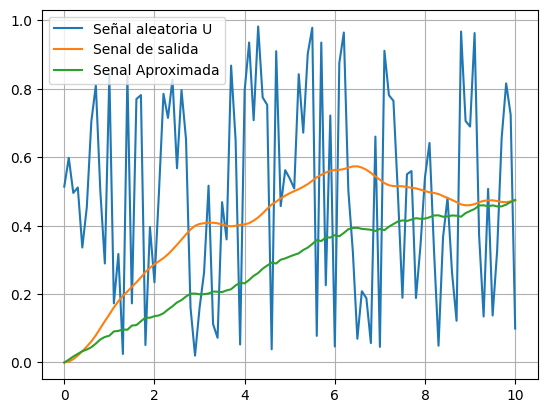

In [288]:
plt.figure()
plt.plot(t, u, label="Señal aleatoria U")
plt.plot(t, y, label="Senal de salida")
plt.plot(t, y2, label="Senal Aproximada")
plt.grid()
plt.legend()
plt.show()

In [289]:
# Aprox sistema de segundo orden
Y = y[3:101]
H = np.column_stack((y[2:100], y[1:99], u[2:100], u[1:99]))


In [290]:
HtH_inv = np.linalg.pinv(H)
teta = HtH_inv @ Y

In [291]:
teta

array([ 1.82104301e+00, -8.29092822e-01,  6.32635790e-03,  1.72794860e-03])

In [292]:
num2 = [teta[2], teta[3]]
den2 = [1, -teta[0], -teta[1]]

In [293]:
system2 = TransferFunction(num2, den2, dt=0.1)

In [294]:
system2

TransferFunctionDiscrete(
array([0.00632636, 0.00172795]),
array([ 1.        , -1.82104301,  0.82909282]),
dt: 0.1
)

In [295]:
_, y3 = dlsim(system2, u)

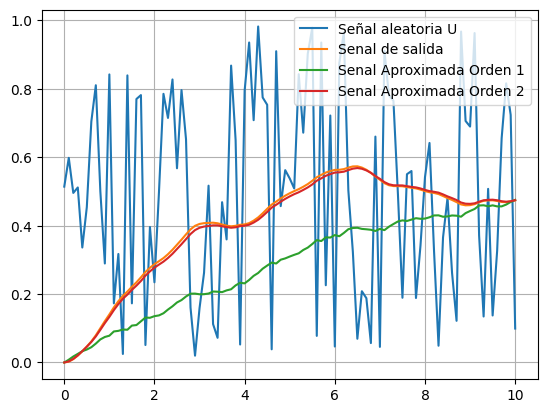

In [296]:
plt.figure()
plt.plot(t, u, label="Señal aleatoria U")
plt.plot(t, y, label="Senal de salida")
plt.plot(t, y2, label="Senal Aproximada Orden 1")
plt.plot(t, y3, label="Senal Aproximada Orden 2")
plt.grid()
plt.legend()
plt.show()

In [297]:
from scipy.signal import tf2zpk
zeros, polos, gain = tf2zpk(system.num, system.den)

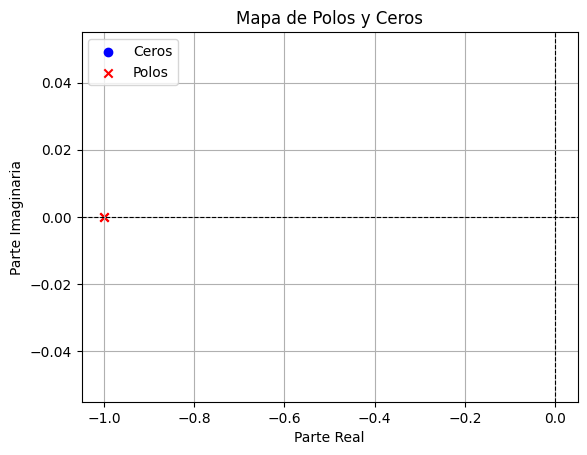

In [298]:
# Graficar el mapa de polos y ceros
plt.figure()
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='b', label='Ceros')
plt.scatter(np.real(polos), np.imag(polos), marker='x', color='r', label='Polos')
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.8)
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.title('Mapa de Polos y Ceros')
plt.grid()
plt.legend()
plt.show()

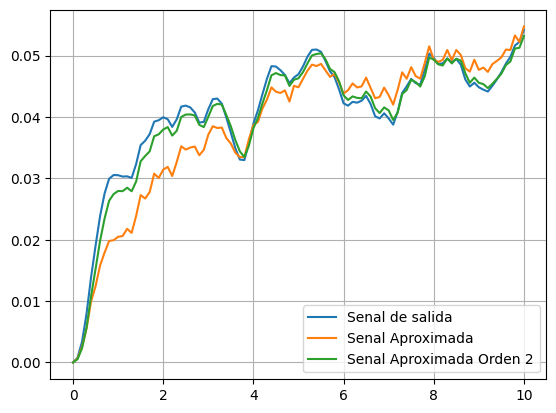

In [380]:
# Vamos a cambiar la platan por un sistema con polos dominantes, con un polo más cerca del eje imaginario.
num = [1]
den1 = [1, 11, 10]
system = TransferFunction(num, den1)
u = np.random.rand(101, 1)
t, y, x = lsim(system, U=u, T=t)
# Este es un sistema de segundo orden, lo vamos a identificar como un sistema de orden 1
# Tenemos que construir una matriz que nos represente las muestras
Y = y[1:101]
H = np.column_stack((y[0:100], u[0:100]))
HtH_inv = np.linalg.pinv(H)
teta = HtH_inv @ Y
num1 = teta[1]
den1 = [1, -teta[0]]
system1 = TransferFunction(num1, den1, dt=0.1)
_, y2 = dlsim(system1, u)

# Aprox sistema de segundo orden
Y = y[2:101]
H = np.column_stack((y[1:100], y[0:99], u[1:100], u[0:99]))
HtH_inv = np.linalg.pinv(H)
teta = HtH_inv @ Y
num2 = [teta[2], teta[3]]
den2 = [1, -teta[0], -teta[1]]
system2 = TransferFunction(num2, den2, dt=0.1)
_, y3 = dlsim(system2, u)
plt.figure()
#plt.plot(t, u, label="Señal aleatoria U")
plt.plot(t, y, label="Senal de salida")#, marker='o')
plt.plot(t, y2, label="Senal Aproximada")#, marker="*")
plt.plot(t, y3, label="Senal Aproximada Orden 2")#, marker=".")
plt.grid()
plt.legend()
plt.show()

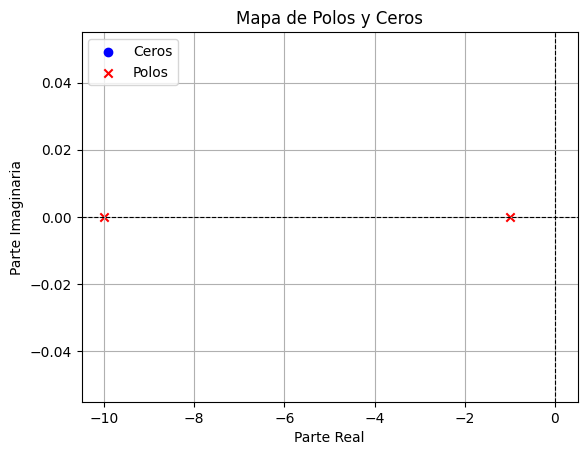

In [300]:
zeros, polos, gain = tf2zpk(system.num, system.den)
# Graficar el mapa de polos y ceros
plt.figure()
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', color='b', label='Ceros')
plt.scatter(np.real(polos), np.imag(polos), marker='x', color='r', label='Polos')
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.8)
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.title('Mapa de Polos y Ceros')
plt.grid()
plt.legend()
plt.show()

Miramos el error entre los sistemas

In [381]:
np.mean((y-y2)**2)

0.0002650457141455592

In [382]:
np.mean((y-y3)**2)

0.00022727742711677328

Siempre se debe tratar de diseñar con el menor orden posible, ya que el controlador va a ser mucho más simple.

Ahora vamos a realizar el modelo fuera de linea: Algoritmo de proyección y algoritmo de minimos cuadrados.

<center><h2>Algorítmo de Proyección

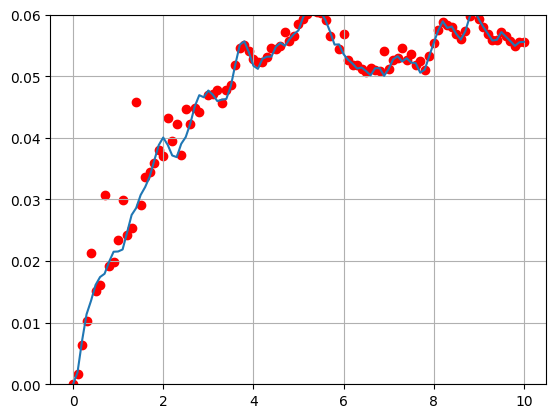

In [423]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, lsim
# Crear un sistema de transferencia
num = [1]
den = [1, 11, 10]
system = TransferFunction(num, den)

# Generar una señal de entrada aleatoria
u = np.random.rand(101)

# Simular el sistema y obtener la respuesta en el tiempo
t = np.linspace(0, 10, 101)  # Supongo un rango de tiempo de 0 a 10
t, y, x = lsim(system, U=u, T=t)

# Inicializar variables para el modelo de primer orden
teta = np.array([0.9, 0.0])
yd = np.zeros(101)
plt.figure()
plt.plot(t, y)
plt.ylim(0, 0.06)
# Bucle para calcular yd y actualizar teta
for k in range(1, 101):
    fi = np.array([y[k], u[k]])
    yd[k] = np.dot(fi.T, teta)
    teta = teta + fi / np.dot(fi.T, fi) * (y[k] - yd[k])
# Crear una figura y trazar las señales
plt.scatter(t, yd, color='red')
plt.grid()
plt.show()


In [404]:
teta

array([9.99999328e-01, 1.25531284e-06])

In [405]:
Y = y[1:101]
H = np.column_stack((y[0:100], u[0:100]))
HtH_inv = np.linalg.pinv(H)
teta = HtH_inv @ Y

In [406]:
teta

array([0.95778277, 0.00459897])

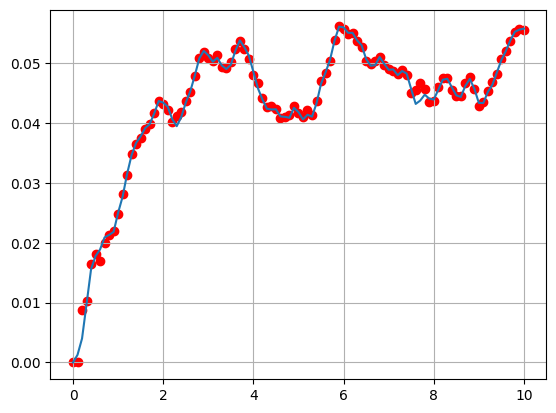

In [412]:
# Inicializar variables para el modelo de segundo orden
teta = np.array([1.3, -0.3, 0.004, 0.0006])
yd2 = np.zeros(101)
plt.figure()
plt.plot(t, y)
#plt.ylim(0, 0.06)
# Bucle para calcular yd y actualizar teta
for k in range(2, 101):
    fi = np.array([y[k], y[k-1], u[k], u[k-1]])
    yd2[k] = np.dot(fi.T, teta)
    teta = teta + fi / np.dot(fi.T, fi) * (y[k] - yd2[k])
# Crear una figura y trazar las señales
plt.scatter(t, yd2, color='red')
plt.grid()
plt.show()


In [408]:
teta

array([ 1.18897882, -0.31140785, -0.13449302,  0.00838322])

In [409]:
Y = y[2:101]
H = np.column_stack((y[1:100], y[0:99], u[1:100], u[0:99]))
HtH_inv = np.linalg.pinv(H)
teta = HtH_inv @ Y

In [410]:
teta

array([ 1.32674846e+00, -3.73103036e-01,  4.01261015e-03,  6.61841926e-04])

<center><h3>Mínimos cuadrados en línea

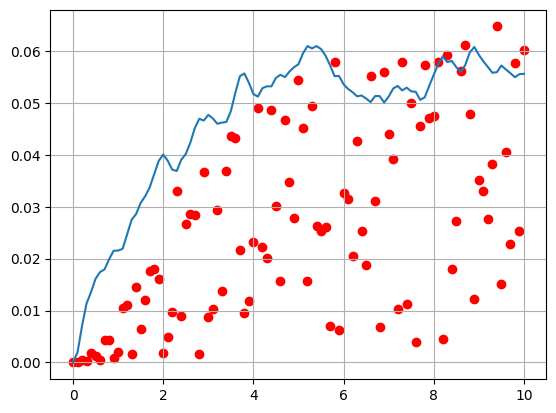

In [434]:
# Inicializar variables para el modelo de primer orden
teta = np.array([0.0, 0.0])
yd = np.zeros(101)
p = np.eye(2);
plt.figure()
plt.plot(t, y)
#plt.ylim(0, 0.06)
# Bucle para calcular yd y actualizar teta
for k in range(1, 101):
    fi = np.array([y[k], u[k]])
    yd[k] = np.dot(fi.T, teta)
    error = y[k] - yd[k]
    # Actualización de teta
    p = p - np.outer(np.dot(p, fi), np.dot(fi, p)) / (1 + np.dot(fi, np.dot(p, fi)))
    teta = teta + np.dot(p, fi) * error
# Crear una figura y trazar las señales
plt.scatter(t, yd, color='red')
plt.grid()
plt.show()


In [435]:
teta

array([0.06522205, 0.06222707])

In [436]:
Y = y[1:101]
H = np.column_stack((y[0:100], u[0:100]))
HtH_inv = np.linalg.pinv(H)
teta = HtH_inv @ Y

In [437]:
teta

array([0.96238697, 0.004128  ])

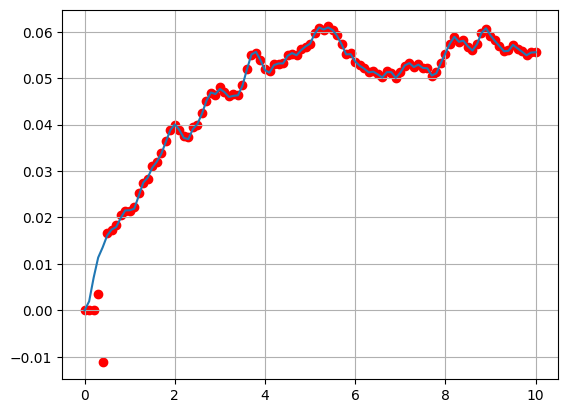

In [443]:
# Inicializar variables para el modelo de segundo orden
teta = np.array([0.0, 0.0, 0.0, 0.0])
yd2 = np.zeros(101)
p = 100000*np.eye(4)
plt.figure()
plt.plot(t, y)
#plt.ylim(0, 0.06)
# Bucle para calcular yd y actualizar teta
for k in range(2, 101):
    fi = np.array([y[k], y[k-1], u[k], u[k-1]])
    yd2[k] = np.dot(fi.T, teta)
    error = y[k] - yd2[k]
    # Actualización de teta
    p = p - np.outer(np.dot(p, fi), np.dot(fi, p)) / (1 + np.dot(fi, np.dot(p, fi)))
    teta = teta + np.dot(p, fi) * error
# Crear una figura y trazar las señales
plt.scatter(t, yd2, color='red')
plt.grid()
plt.show()


In [444]:
teta

array([8.55692148e-01, 1.36452887e-01, 2.10279097e-04, 6.12592093e-04])

In [445]:
Y = y[2:101]
H = np.column_stack((y[1:100], y[0:99], u[1:100], u[0:99]))
HtH_inv = np.linalg.pinv(H)
teta = HtH_inv @ Y

In [446]:
teta

array([ 1.31915955e+00, -3.63548956e-01,  3.83868370e-03,  6.77424493e-04])